In [1]:


from scipy.optimize import root_scalar, root
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from decimal import Decimal
from math import isclose
import sys
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
cm = 1/2.54  
width = 12*cm 



In [2]:
class TickProperties():
    
    major_xtick_step = 5,
    minor_xtick_step = 1
    major_ytick_step = 5
    minor_ytick_step = 1
    STRIP_OF_ZEROS_X = False
    STRIP_OF_ZEROS_Y = False

    def __init__(self,\
    xtick_step_major = 5,\
    xtick_step_minor = 1,\
    ytick_step_major = 5,\
    ytick_step_minor = 1,\
    SZX = False,\
    SZY = False):
        self.major_xtick_step = xtick_step_major
        self.minor_xtick_step = xtick_step_minor
        self.major_ytick_step = ytick_step_major
        self.minor_ytick_step = ytick_step_minor
        self.STRIP_OF_ZEROS_X = SZX
        self.STRIP_OF_ZEROS_Y = SZY

class Format():
    numb_xticks = None
    numb_yticks = None
    custom_func_x = None
    custom_func_y = None
    x_scale = None
    y_scale = None
    x_precion = "{:.2f}"
    y_precion = "{:.2f}"
    def __init__(self,numb_xticks=None,numb_yticks=None,custom_funx=None,custom_funy=None,xscale=None,yscale=None,xprec="{:.2f}",yprec="{:.2f}"):
        self.numb_xticks =numb_xticks
        self.numb_yticks = numb_yticks
        self.custom_func_x = custom_funx
        self.custom_func_y = custom_funy
        self.x_precion=xprec
        self.y_precion = yprec
        self.x_scale = xscale
        self.y_scale = yscale
    def formatx0(self,x,pos):
        try:
                # print(x,pos)#,"{:.2f}".format(w[int(x)]))
            # print(x,pos,self.numb_xticks)
            index = int((pos-1)*self.x_scale.shape[0]//self.numb_xticks)
            # print(index)
            # print(self.x_precion.format(self.x_scale[index]))
            return self.x_precion.format(self.x_scale[index])
        except:
            return self.x_precion.format(self.x_scale[-1])
    def formatx1(self,x,pos):
        try:
                # print(x,pos)#,"{:.2f}".format(w[int(x)]))
            # print(pos)
            index = int((pos)*self.x_scale.shape[0]//self.numb_xticks)
            # print(index)
            # print()
            return self.x_precion.format(self.x_scale[index])
        except:
            return self.x_precion.format(self.x_scale[-1])
    
    def formaty1(self,x,pos):
        try:
                # print(x,pos)#,"{:.2f}".format(w[int(x)]))

            index = int((pos-1)*self.y_scale.shape[0]//self.numb_yticks)
            # print(index)
            # print()
            return self.y_precion.format(self.y_scale[index])
        except:
            return self.y_precion.format(self.y_scale[-1])
        
    def formaty(self,x,pos):
        try:
            return self.y_precion.format(self.y_scale[int(x)])
        except:
            return ""

class Setup_Fig():
    DEFAULT_HEAT_EXTEND = (-0.5,39.5,29.5,-0.5)
    xlim = None
    ylim = None
    tickprop = TickProperties()
    formatter = Format()
    cm = 1/2.54 
    fig_width = 12*cm
    fig_height = 4.8/6.4*12*cm
    name_of_plot = None
    def __init__(self,name_of_plot = "sign_of_ev1.pdf",xlim=None,ylim=None,tickp=TickProperties(),formater=Format()):
        self.xlim=xlim
        self.ylim = ylim   
        self.tickprop =tickp       
        self.formatter = formater
        self.name_of_plot = name_of_plot

    
    plt.rcParams["lines.markersize"]=0.7
    plt.rcParams["axes.unicode_minus"]=True
    plt.rcParams["font.size"]=10
    plt.rcParams["text.usetex"]=True
    plt.rcParams["font.serif"]="Computer Modern Serif"
# ax.scatter(A,root,color='0')
    



    def return_fig(self,shape=(1,1),dots_per_inch=400,xax_share=False,yax_share=False,joined=False,set_ticks=True,heightratio=None):
        if heightratio:
            fig, ax = plt.subplots(*shape,figsize=(self.fig_width,self.fig_height),dpi=dots_per_inch,sharex=xax_share,sharey=yax_share,height_ratios=heightratio)
        else:
            fig, ax = plt.subplots(*shape,figsize=(self.fig_width,self.fig_height),dpi=dots_per_inch,sharex=xax_share,sharey=yax_share)
        trash, xw, yw, trash=self.DEFAULT_HEAT_EXTEND# im.get_extent()
        self.formatter.numb_xticks = xw//self.tickprop.major_xtick_step
        self.formatter.numb_yticks = yw//self.tickprop.major_ytick_step
        
        for i in range(shape[0]):
            for j in range(shape[1]):
                pos= 'outer_left'
                if shape[0]==1:
                    if shape[1]==1:
                        current_ax = ax
                    else:
                        current_ax = ax[j]
                else:
                    if shape[1]==1:
                        current_ax = ax[i]
                    else:
                        current_ax = ax[i,j]
                        if j==0:
                           pos= 'outer_left'
                        elif j<shape[1]-1:
                            pos = 'middle'
                        elif j==shape[1]-1:
                            pos = 'outer_right'
                        


        # axlimits have to be adapted
                try:
                    current_ax.set_xlim(*self.xlim)
                except:
                    pass
                try:
                    current_ax.set_ylim(*self.ylim)
                except:
                    pass    
            
                if set_ticks:
                    if self.tickprop.STRIP_OF_ZEROS_X:
                        current_ax.xaxis.set_major_formatter(ticker.FuncFormatter(self.formatter.formatx0))
                    current_ax.yaxis.set_major_locator(ticker.MultipleLocator(self.tickprop.major_ytick_step))
                    current_ax.yaxis.set_minor_locator(ticker.MultipleLocator(self.tickprop.minor_ytick_step))
                    current_ax.xaxis.set_major_locator(ticker.MultipleLocator(self.tickprop.major_xtick_step))
                    current_ax.xaxis.set_minor_locator(ticker.MultipleLocator(self.tickprop.minor_xtick_step))

                    if self.tickprop.STRIP_OF_ZEROS_Y:
                        current_ax.yaxis.set_major_formatter(ticker.FuncFormatter(self.formatter.formaty1))  

                if joined:
                    if i<shape[0]-1:
                        current_ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=False)
                    else:
                        current_ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
                        
                    if pos=='outer_left':
                        current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)
                    elif pos=='middle':
                        current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=False)
                    elif pos=='outer_right':
                        current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelright=True)
                        # current_ax.set_xlabel(r'$\Gamma \tilde{A}$')
                        # current_ax.set_ylabel(r'$\tilde{y}$',rotation=0)
                else:
                    current_ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
                    
                    current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)   


                current_ax.tick_params(axis='both',which='major',length=4.5)
                plt.setp(current_ax.yaxis.get_majorticklabels(),va='center')
        
        return fig, ax


In [ ]:
# cdf_k_young = pd.read_csv("cdf_k_young_800k_in_200steps.csv",header=None,delimiter=';').to_numpy()[:,:-1]
# pdf_k_young = cdf_k_young[1:,:]-cdf_k_young[:-1,:]
# k_young = pd.read_csv("kgrid_young_org.csv",header=None,delimiter=';').to_numpy()[:,:-1]
# pdf_k_young_org =  pd.read_csv("pdf_k_young_org.csv",header=None,delimiter=';').to_numpy()[:,:-1]

In [ ]:
# saved code

# import os
# import re
# folders =[]
# folder_path = "out_full_spline_derivative/"#"out_derivative_by_diff/"#
# files  = os.listdir(folder_path.strip("/"))
# for file in files:
#     if os.path.isdir(folder_path+file):
#         if re.search(r'[0-9]+$',file):
#             n = int(re.search(r'[0-9]+$',file).group(0))
#             folders.append([n,file])
# # cuts = pd.read_csv(folder_path+"cut_offs.csv",header=None,delimiter=';').to_numpy()[:,:-1]
# # folders_pdf = "out/img_pdf_k/"
# # os.mkdir(folders_pdf.strip('/'))
# # folders_cond_cdf = "out/img_bcondk/"
# # os.mkdir(folders_cond_cdf.strip('/'))
# folders  =pd.DataFrame(folders)
# folders.sort_values(by=[0],inplace=True)
# folders.reset_index(inplace=True)
# k = np.exp(np.linspace(np.log(1.0), np.log(800+1.0),  200))[:] - 1.0
# m = np.exp(np.linspace(0, np.log(500+ 1.0), 200))[:] - 1.0
# for file_index in range(10):#len(folders)):
# # for file_index in range(3):
#     file = folders.loc[file_index,1]
#     if True or os.path.isdir(folder_path+file) and int(re.search(r'[0-9]+$',file).group(0))<2:
#         print(file)

#         # cdfk_initial = pd.read_csv(folder_path+file+"/cdf_k_initial.csv",header=None,delimiter=';').to_numpy()[:,:-1]
#         pdfk_initial = pd.read_csv(folder_path+file+"/pdf_k_initial.csv",header=None,delimiter=';').to_numpy()[:,:-1]
#         cdf_bcondk_initial = pd.read_csv(folder_path+file+"/cdfb_condk_initial.csv",header=None,delimiter=';').to_numpy()[:,:-1]
#         pdf_bcondk_initial = cdf_bcondk_initial[1:]-cdf_bcondk_initial[:-1]
#         cdf_bcondk_a = pd.read_csv(folder_path+file+"/bcondk_a.csv",header=None,delimiter=';').to_numpy()[:,:-1]
#         pdf_bcondk_a = cdf_bcondk_a[1:]-cdf_bcondk_a[:-1]
#         cdf_bcondk_n = pd.read_csv(folder_path+file+"/bcondk_n.csv",header=None,delimiter=';').to_numpy()[:,:-1]
#         pdf_bcondk_n = cdf_bcondk_n[1:]-cdf_bcondk_n[:-1]
#         # cdf_k_a = pd.read_csv(folder_path+file+"/k_a.csv",header=None,delimiter=';').to_numpy()[:,:-1]
#         # cdf_k_dep_b = pd.read_csv(folder_path+file+"/cdf_k_dep_b.csv",header=None,delimiter=';').to_numpy()[:,:-1]
#         pdf_k_a = pd.read_csv(folder_path+file+"/pdf_k_a.csv",header=None,delimiter=';').to_numpy()[:,:-1]
#         cdf_prime = pd.read_csv(folder_path+file+"/cdf_prime.csv",header=None,delimiter=';').to_numpy()[:,:-1]
#         cdf_k_prime = cdf_prime[-1,:]
#         pdf_k_prime = cdf_k_prime[1:]-cdf_k_prime[:-1]
#         cdf_prime = cdf_prime[:-1,:]
#         n = folders.loc[file_index,0]
        
#         fig, ax = plt.subplots(1,2)
#         start =0
#         stop = -15
#         # initial = plt.plot(k[start:stop],pdfk_initial[start:stop,1])
#         plt.title(f"iterationstep: {folders.loc[file_index,0]}")
#         # prime_a = plt.plot(k[start:stop],pdf_k_a[start:stop,1])
#         prime = ax[0].plot(k[start+1:stop],1/pdf_k_prime[start:stop])
#         ax[1].plot(k[start+1:stop],1/pdf_k_young[start:stop,1])
#         # ax[1].plot(k_young[start:stop],pdf_k_young_org[start:stop,1])
#         # if not re.search('normal',file):
#         #     plt.scatter(k[stop-2],pdfk_initial[(start+stop)//2,1],marker="*",s=35,color='indianred')
#         # plt.legend([initial[0],prime_a[0],prime[0]],['initial','prime_a','prime'])
#         # plt.ylim(-0.001,0.036)
#         # plt.scatter(k[int(max(0,cuts[n,0]-5)):int(cuts[n,0])],pdfk_initial[int(max(0,cuts[n,0]-5)):int(cuts[n,0]),1],marker="*",s=35,color='tab:blue')
#         # plt.scatter(k[int(max(0,cuts[n,1]-4)):int(max(0,cuts[n,1]-4)+5)],pdf_k_prime[int(max(0,cuts[n,1]-5)):int(max(0,cuts[n,1]-5)+5)],marker="*",s=35,color='tab:green')
#         # plt.scatter(k[int(max(0,cuts[n,2]-5)):int(cuts[n,2])],pdf_k_a[int(max(0,cuts[n,2]-5)):int(cuts[n,2]),1],marker="*",s=35,color='tab:orange')
#         # plt.show()
#         # plt.plot(k,cdfk_initial[:,1])
#         # plt.plot(k,cdf_k_prime)
#         # plt.plot(k,cdf_k_a)
#         # plt.plot(k,cdf_k_young[:,1]/0.2857142857142863)
#         # plt.scatter(bins[:-1],np.cumsum(number))
#         # plt.savefig(folders_pdf+file+'.png')
#         plt.show()
#         # plt.figure()
#         # plt.plot(k[:-1],cdf_k_young[1:,1]-cdf_k_young[:-1,1])
#         # # plt.scatter(bins[:-1],number)
#         # plt.figure()
#         # tickformat = Format(xscale=k,yscale=m,xprec="{:.1f}",yprec="{:.1f}")
#         # # plots = [stab_xsol,stab_ysol,stab_zsol]
#         # tickp = TickProperties(SZX=True,SZY=True,\
#         #                     xtick_step_major=10,\
#         #                         xtick_step_minor=5,\
#         #                             ytick_step_major=10,\
#         #                                 ytick_step_minor=5)
#         # setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
#         # plot_dim = (-0.5,60.5, 60.5, -0.5)
#         # setup.fig_width= 20.6*cm
#         # setup.fig_height=8*cm #29.1*cm
#         # # im = plt.imshow(numberc_w)
#         # heat_extent = plot_dim
#         # setup.DEFAULT_HEAT_EXTEND =  heat_extent
#         # fig, ax = setup.return_fig(shape=(1,1),dots_per_inch=600)
#         # print(pdf_bcondk_initial.shape)
#         # # im = ax.imshow(np.log(cdf_bcondk_young),extent=plot_dim)
#         # im = ax.imshow(cdf_bcondk_n,extent=plot_dim)
#         # plt.title(f"iterationstep: {folders.loc[file_index,0]} bcondk n")
#         # cbar = plt.colorbar(im,ax=ax)
#         # plt.show()


#         # tickformat = Format(xscale=k,yscale=m,xprec="{:.1f}",yprec="{:.1f}")
#         # # plots = [stab_xsol,stab_ysol,stab_zsol]
#         # tickp = TickProperties(SZX=True,SZY=True,\
#         #                     xtick_step_major=10,\
#         #                         xtick_step_minor=5,\
#         #                             ytick_step_major=10,\
#         #                                 ytick_step_minor=5)
#         # setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
#         # plot_dim = (-0.5,60.5, 60.5, -0.5)
#         # setup.fig_width= 20.6*cm
#         # setup.fig_height=8*cm #29.1*cm
#         # # im = plt.imshow(numberc_w)
#         # heat_extent = plot_dim
#         # setup.DEFAULT_HEAT_EXTEND =  heat_extent
#         # fig, ax = setup.return_fig(shape=(1,1),dots_per_inch=600)
#         # # print(pdf_bcondk_initial.shape)
#         # # im = ax.imshow(np.log(cdf_bcondk_young),extent=plot_dim)
#         # im = ax.imshow(cdf_bcondk_a,extent=plot_dim)
#         # plt.title(f"iterationstep: {folders.loc[file_index,0]} bcondk a")
#         # cbar = plt.colorbar(im,ax=ax)
#         # plt.show()

#         # tickformat = Format(xscale=k,yscale=m,xprec="{:.1f}",yprec="{:.1f}")
#         # # plots = [stab_xsol,stab_ysol,stab_zsol]
#         # tickp = TickProperties(SZX=True,SZY=True,\
#         #                     xtick_step_major=10,\
#         #                         xtick_step_minor=5,\
#         #                             ytick_step_major=10,\
#         #                                 ytick_step_minor=5)
#         # setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
#         # plot_dim = (-0.5,60.5, 60.5, -0.5)
#         # setup.fig_width= 20.6*cm
#         # setup.fig_height=8*cm #29.1*cm
#         # # im = plt.imshow(numberc_w)
#         # heat_extent = plot_dim
#         # setup.DEFAULT_HEAT_EXTEND =  heat_extent
#         # fig, ax = setup.return_fig(shape=(1,1),dots_per_inch=600)
#         # # print(pdf_bcondk_initial.shape)
#         # # im = ax.imshow(np.log(cdf_bcondk_young),extent=plot_dim)
#         # im = ax.imshow(cdf_prime,extent=plot_dim)


#         # cbar = plt.colorbar(im,ax=ax)
#         # ax.text(65,-3,s=r'$F(b|k)$')
#         # ax.set_xlabel(r'$k$')
#         # ax.set_ylabel(r"$b$",rotation=0)
#         # if not re.search('normal',file):
#         #     ax.scatter(57,57,marker="*",s=20,color='indianred')
#         # plt.title(f"iterationstep: {folders.loc[file_index,0]}")
#         # # plt.savefig(folders_cond_cdf+file+'.png',bbox_inches='tight')
#         # plt.show()
#         # # break
                



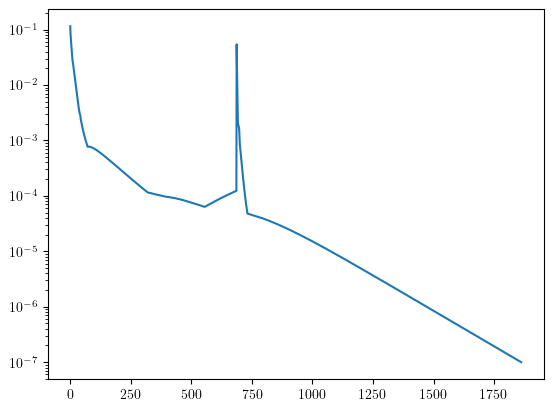

In [13]:
# dist = pd.read_csv(f"out_long_run_spline_der_80k50b50steps_square/difference.csv",header=None,delimiter=';').to_numpy()
dist = pd.read_csv(f"out/difference.csv",header=None,delimiter=';').to_numpy()
fig, ax = plt.subplots(1,1)
start = 0
ax.set_yscale('log',base=10)
ax.plot(np.arange(len(dist))[start:],dist[start:])
plt.show()


np.int64(0)

In [10]:
from scipy.interpolate import PchipInterpolator
def func(x):
    return 1/(1+0.065/0.935*x)
def func_inv(x):
    return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
def find_pos(array,val,strict=False):
    if strict:
        for i in range(len(array)):
            if array[i]>val:
                return i
    else:
        for i in range(len(array)):
            if array[i]>=val:
                return i
    return -1


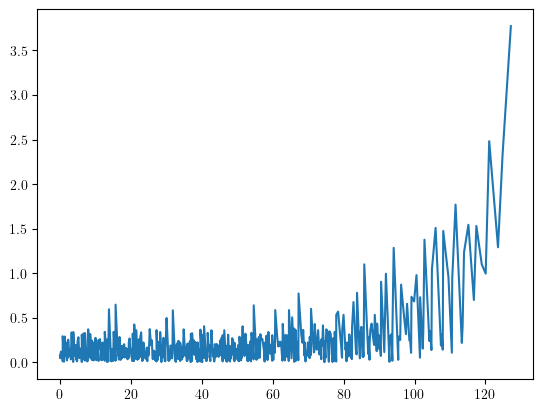

In [24]:
w_grid = pd.read_csv(f"out/w_grid.csv",header=None,delimiter=';').to_numpy()
plt.figure()
plt.plot(w_grid[:-1],w_grid[1:]-w_grid[:-1])
plt.show()

In [44]:
np.any((optk_sorted[1:]-optk_sorted[:-1])<0)
optk_sorted[-1]

array([127.59434306])

80


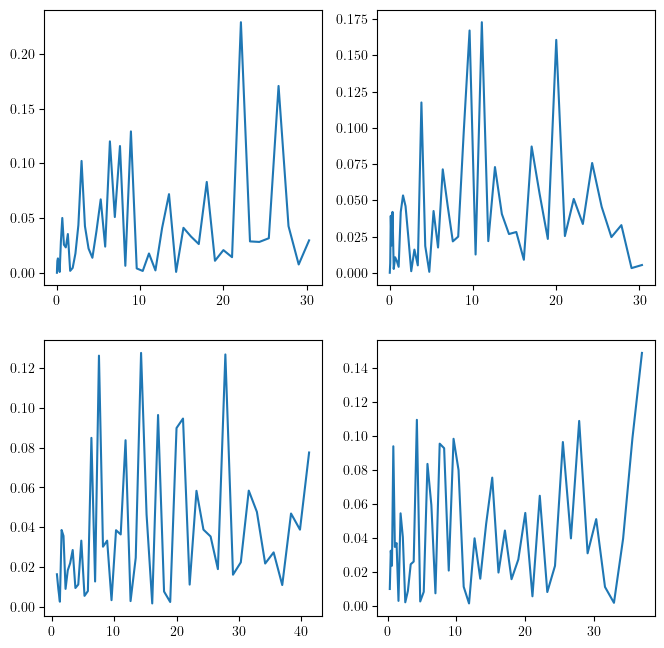

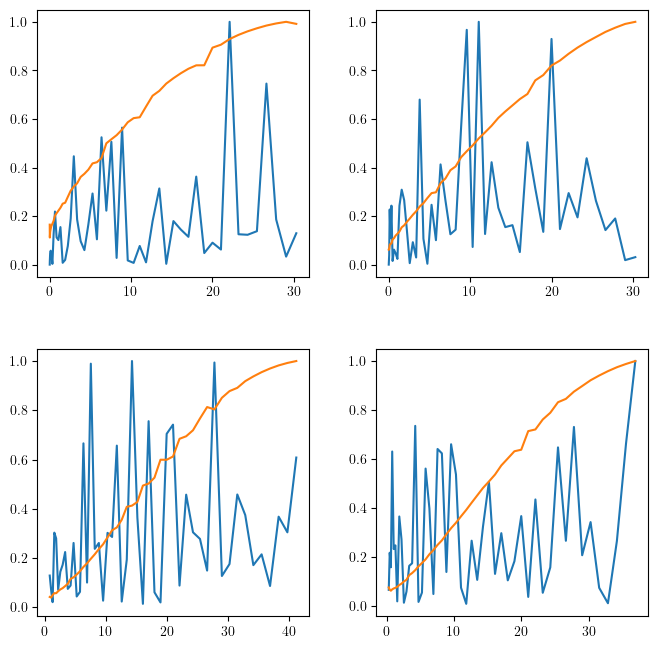

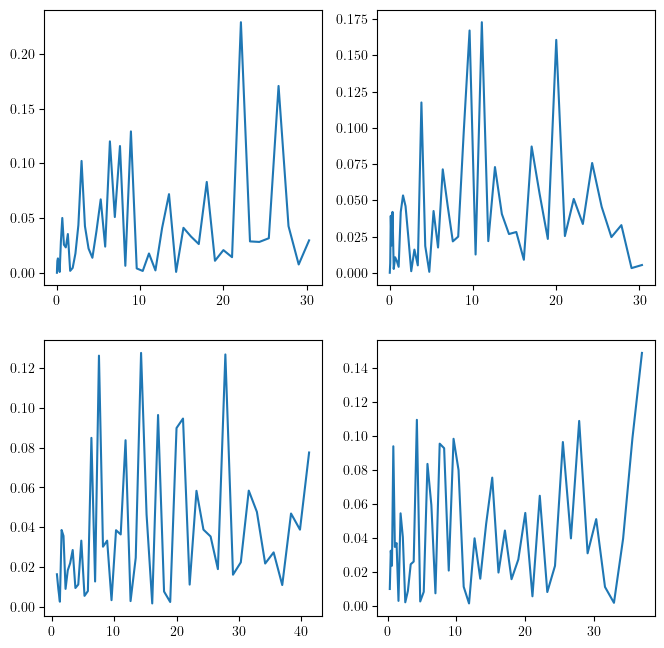

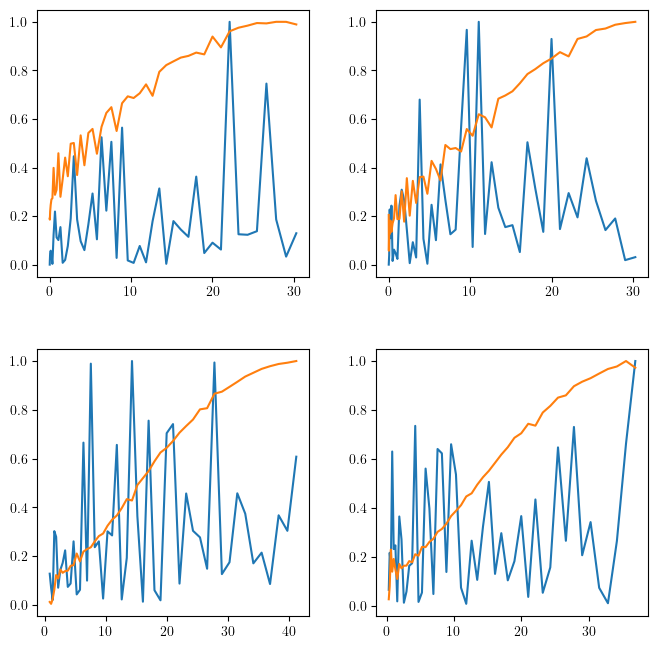

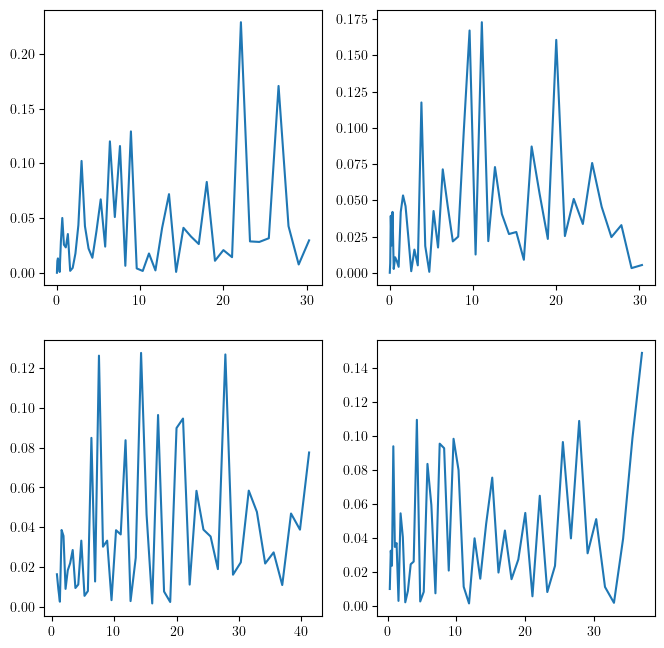

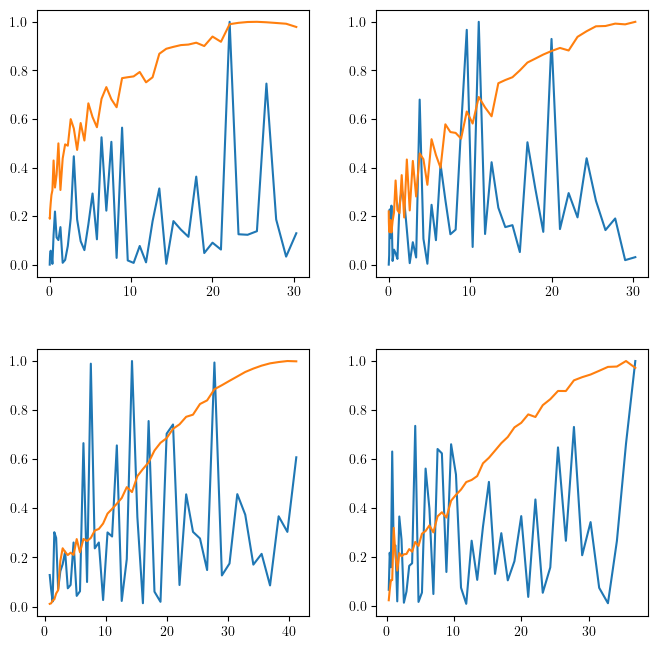

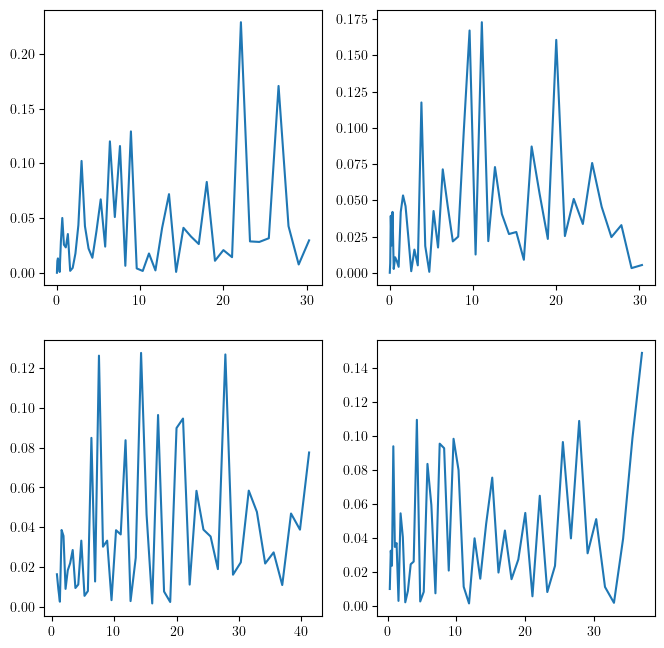

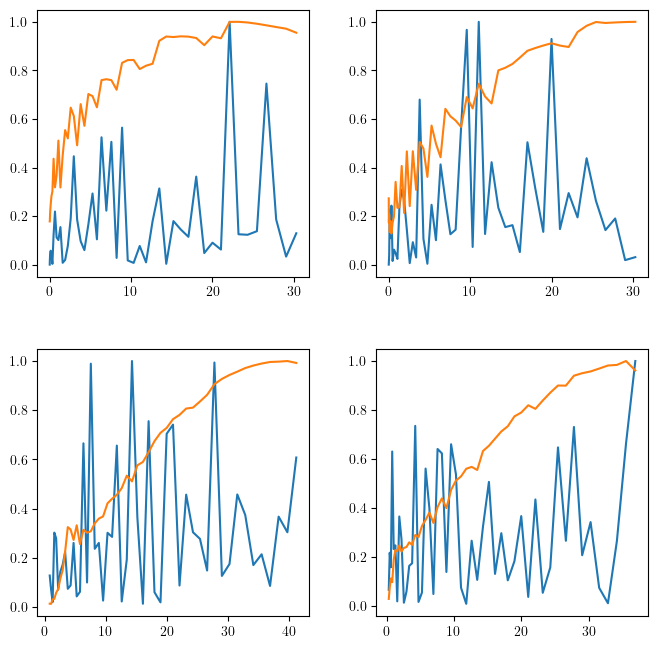

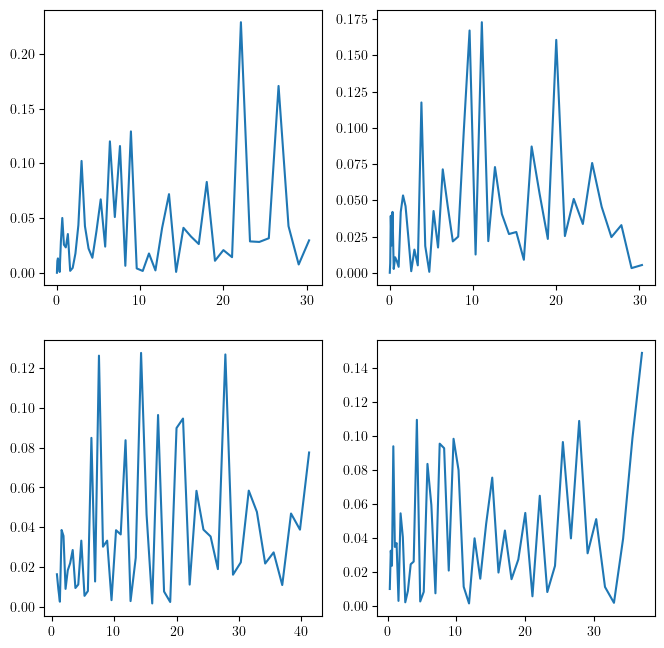

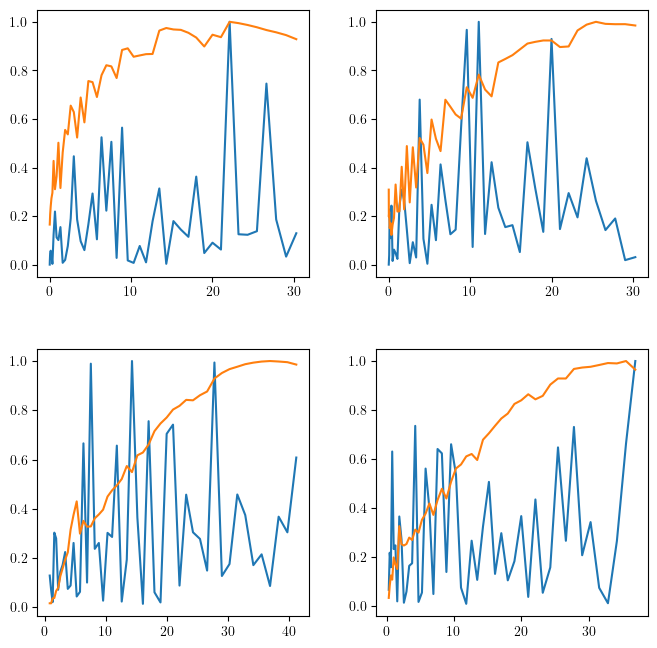

In [ ]:
import os
import re

folders =[]
folder_path = "out/"#_start_pdf_k_young_changing_pdf_y_80k50b100steps_square/"#"out/"#_diffder_changing_pdf_y_80k50b100steps_square/"#"out_derdiff_square_80k50b120steps/"#"_out_diffder_80k_50b_50steps_square/"#"out_small_grid_long_run//"#_derdiff_80k50b80steps/"#"out/""#"out_full_spline_derivative/"#"out_derivative_by_diff/"#"out_derdiff_80k50b80steps/"#"out_long_run_spline_der_80k50b50steps_square/"#
files  = os.listdir(folder_path.strip("/"))
for file in files:
    if os.path.isdir(folder_path+file):
        if re.search(r'[0-9]+$',file):
            n = int(re.search(r'[0-9]+$',file).group(0))
            folders.append([n,file])

pic_folders = "img_pdf_start/"


# pic_folders = "img_inverse_pdf_k/"

# pic_folders= "img_bcondk/"
# os.mkdir(folders_cond_cdf.strip('/'))
folders_save = folder_path+pic_folders
if not os.path.isdir(folders_save.strip('/')):
    os.mkdir(folders_save.strip('/'))
folders  =pd.DataFrame(folders)
folders.sort_values(by=[0],inplace=True)
folders.reset_index(inplace=True)

grid_size = pd.read_csv(folder_path+f"/pdf_k_young_grid.csv",header=None,delimiter=';').to_numpy().shape[0]#+folders.loc[0,1]
print(grid_size)
k, m = np.ones(grid_size), np.ones(grid_size)
expo = False
if expo:
    k[:-1] = np.exp(np.linspace(np.log(1.0), np.log(80+1.0),  79))[:] - 1.0
    m[:-1] = np.exp(np.linspace(0, np.log(50+ 1.0), 79))[:] - 1.0
else:
    k[:-1] = (np.linspace(0, np.sqrt(80),  grid_size-1))**2
    m[:-1] = (np.linspace(0, np.sqrt(50), grid_size-1))**2
m[-1] = 150
k[-1] = 150
pdf_k_young = pd.read_csv(folder_path+f"/pdf_k_young_org.csv",header=None,delimiter=';').to_numpy()
pdf_k_young_grid = pd.read_csv(folder_path+f"/pdf_k_young_grid.csv",header=None,delimiter=';').to_numpy()
w_grid = pd.read_csv(folder_path+f"w_grid.csv",header=None,delimiter=';').to_numpy()

k_young = pd.read_csv(folder_path+f"/k_young.csv",header=None,delimiter=';').to_numpy()
save = True
save = False
for file_index in range(0,len(folders),2):
# for file_index in range(73):#len(folders)):
# for file_index in range(3):
    file = folders.loc[file_index,1]
    if True or os.path.isdir(folder_path+file) and int(re.search(r'[0-9]+$',file).group(0))<2:
     

        fig1, ax1 = plt.subplots(2,2,figsize=(20*cm,20*cm))

        # tickformat = Format(xscale=k,yscale=m,xprec="{:.1f}",yprec="{:.1f}")
        # # plots = [stab_xsol,stab_ysol,stab_zsol]
        # tickp = TickProperties(SZX=True,SZY=True,\
        #                     xtick_step_major=10,\
        #                         xtick_step_minor=5,\
        #                             ytick_step_major=10,\
        #                                 ytick_step_minor=5)
        # setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
        # plot_dim = (-0.5,60, 60, -0.5)
        # setup.fig_width= 20*cm
        # setup.fig_height=20*cm #29.1*cm
        # # im = plt.imshow(numberc_w)
        # heat_extent = plot_dim
        # setup.DEFAULT_HEAT_EXTEND =  heat_extent
        # fig2, ax2 = setup.return_fig(shape=(2,2),dots_per_inch=600)

        # tickformat = Format(xscale=k,yscale=m,xprec="{:.1f}",yprec="{:.1f}")
        # # plots = [stab_xsol,stab_ysol,stab_zsol]
        # tickp = TickProperties(SZX=True,SZY=True,\
        #                     xtick_step_major=10,\
        #                         xtick_step_minor=5,\
        #                             ytick_step_major=10,\
        #                                 ytick_step_minor=5)
        # setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
        # plot_dim = (-0.5,60, 60, -0.5)
        # setup.fig_width= 20*cm
        # setup.fig_height=20*cm #29.1*cm
        # # im = plt.imshow(numberc_w)
        # heat_extent = plot_dim
        # setup.DEFAULT_HEAT_EXTEND =  heat_extent
        # fig3, ax3 = setup.return_fig(shape=(2,2),dots_per_inch=600)

        # tickformat = Format(xscale=k,yscale=m,xprec="{:.1f}",yprec="{:.1f}")
        # # plots = [stab_xsol,stab_ysol,stab_zsol]
        # tickp = TickProperties(SZX=True,SZY=True,\
        #                     xtick_step_major=20,\
        #                         xtick_step_minor=5,\
        #                             ytick_step_major=10,\
        #                                 ytick_step_minor=5)
        # setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
        # plot_dim = (-0.5,60, 60, -0.5)
        # setup.fig_width= 20*cm
        # setup.fig_height=20*cm #29.1*cm
        # # im = plt.imshow(numberc_w)
        # heat_extent = plot_dim
        # setup.DEFAULT_HEAT_EXTEND =  heat_extent
        # fig4, ax4 = setup.return_fig(shape=(2,2),dots_per_inch=600)


        fig4, ax4 = plt.subplots(2,2,figsize=(20*cm,20*cm))

        stops = [20,20,30,30]
        for i_y in range(1,5):

            # pdfk_initial = pd.read_csv(folder_path+file+f"/pdf_k_initial_{i_y}.csv",header=None,delimiter=';').to_numpy()
            # pdf_k_a = pd.read_csv(folder_path+file+f"/pdf_k_a_{i_y}.csv",header=None,delimiter=';').to_numpy()
            # cdf_prime = pd.read_csv(folder_path+file+f"/cdf_prime_{i_y}.csv",header=None,delimiter=';').to_numpy()#[:,:-1]
            # cdf_k_prime = cdf_prime[-1,:]
            # pdf_k_prime = cdf_k_prime[1:]-cdf_k_prime[:-1]
            # cdf_prime = cdf_prime[:-1,:]
            # n = folders.loc[file_index,0]
            # pdf_k_prime2 = pd.read_csv(folder_path+file+f"/pdf_k_prime_{i_y}.csv",header=None,delimiter=';').to_numpy()
            # cdf_bcondk_n = pd.read_csv(folder_path+file+f"/bcondk_n_{i_y}.csv",header=None,delimiter=';').to_numpy()
            # cdf_bcondk_a = pd.read_csv(folder_path+file+f"/bcondk_a_{i_y}.csv",header=None,delimiter=';').to_numpy()
            cdf_w = pd.read_csv(folder_path+file+f"/cdf_w_y{i_y}.csv",header=None,delimiter=';').to_numpy()
            optk_sorted = pd.read_csv(folder_path+file+f"/optk_sorted_y{i_y}.csv",header=None,delimiter=';').to_numpy()
            # cdf_prior = pd.read_csv(folder_path+file+f"/distr_prior_y_MC_step_{i_y}.csv",header=None,delimiter=';').to_numpy()

            cdf_k = np.zeros_like(k)
            differences = np.zeros(len(k))
            for j in range(len(k)):
                pos = find_pos(optk_sorted,k[j])
                if pos==0:
                    cdf_k[j]= cdf_w[0,0]
                    differences[j] = optk_sorted[0,0]-k[j]
                    continue
                elif pos<0:
                    cdf_k[j]= cdf_w[-1,0]
                    differences[j]= k[j]-optk_sorted[-1,0]
                    continue
                diff_l = k[j]-optk_sorted[pos-1,0]
                diff_r = optk_sorted[pos,0]-k[j]
                differences[j] = min(diff_l,diff_r)
                cdf_k[j] = (cdf_w[pos-1,0]*diff_r+cdf_w[pos,0]*diff_l)/(diff_l+diff_r)
            i0 = find_pos(optk_sorted[1:]-optk_sorted[:-1],0,strict=True)
            interpolator = PchipInterpolator(optk_sorted[i0:,0],cdf_w[i0:,0])
            i1 = find_pos(k,optk_sorted[i0])
            cdf_k2 = interpolator(k[i1:])
            k_plot = k[i1:]
            # print(f"y={i_y}")
            # for i in range(len(optk_sorted)-1):
            #     if optk_sorted[i+1]-optk_sorted[i]==0:
            #         print(i)
            start = 2
            # stop = stops[i_y-1]
            stop = 50
            # ax1[i_y//3,i_y%2-1].plot(w_grid[:stop-1],cdf_w[1:stop]-cdf_w[:stop-1])
            # ax4[i_y//3,i_y%2-1].plot(w_grid[:stop-1],optk_sorted[1:stop]-optk_sorted[:stop-1])
            ax1[i_y//3,i_y%2-1].plot(k[i1:i1+stop-1],differences[i1:i1+stop-1])
            ax4[i_y//3,i_y%2-1].plot(k[i1:i1+stop-1],differences[i1:i1+stop-1]/np.max(differences[i1:i1+stop-1]))
            # ax4[i_y//3,i_y%2-1].plot(k[:stop-1],(cdf_k[1:stop]-cdf_k[:stop-1])/np.max(cdf_k[1:stop]-cdf_k[:stop-1]))
            ax4[i_y//3,i_y%2-1].plot(k_plot[:stop-1],(cdf_k2[1:stop]-cdf_k2[:stop-1])/np.max(cdf_k2[1:stop]-cdf_k2[:stop-1]))
            # ax4[i_y//3,i_y%2-1].plot(k[:stop],cdf_k[:stop])
            # ax4[i_y//3,i_y%2-1].plot(k_plot[:stop],cdf_k2[:stop])
            # ax4[i_y//3,i_y%2-1].plot(w_grid[:stop-1],w_grid[1:stop]-w_grid[:stop-1])
            # stop = pdf_k_young_grid.shape[0]
            # initial = ax1[i_y//3,i_y%2-1].plot(k[start:],pdfk_initial[start:,i_y-1])
            # initial = ax1[i_y//3,i_y%2-1].plot(k[start:stop],pdfk_initial[start:stop,i_y-1])

            # ax1[i_y//3,i_y%2-1].set_title(f"i_y={i_y}; iterationstep: {folders.loc[file_index,0]}")


            # prime_a = ax1[i_y//3,i_y%2-1].plot(k[start:stop],pdf_k_a[start:stop,i_y-1])

            # term_n = ax1[i_y//3,i_y%2-1].plot(k[start:stop],func(pdf_k_a[start:stop,i_y-1]/pdfk_initial[start:stop,i_y-1]))
            # term_a = ax1[i_y//3,i_y%2-1].plot(k[start:stop],func_inv(pdf_k_a[start:stop,i_y-1]/pdfk_initial[start:stop,i_y-1]))
            # ax1[i_y//3,i_y%2-1].set_xlabel("k")
            # # ax1[i_y//3,i_y%2-1].set_yscale('log',base=10)
            # prime2 = ax1[i_y//3,i_y%2-1].plot(k[start:],pdf_k_prime2[start:,i_y-1])
            # young_org = ax1[i_y//3,i_y%2-1].plot(k_young[start:100],pdf_k_young[start:100,i_y-1])

            # young = ax1[i_y//3,i_y%2-1].plot(k[start:stop],pdf_k_young_grid[start:stop,i_y-1])

            # # prime2 = ax1[i_y//3,i_y%2-1].plot(k[start:stop],1/pdf_k_prime2[start:stop,i_y-1])
            # if not re.search('normal',file):
                # ax1[i_y//3,i_y%2-1].scatter(k[start],(np.max(pdfk_initial[start:stop,i_y-1])+np.min(pdfk_initial[start:stop,i_y-1]))/2,marker="*",s=35,color='indianred')
            # ax1[i_y//3,i_y%2-1].legend([term_a[0],term_n[0]],['a','n'])

            # ax1[i_y//3,i_y%2-1].legend([initial[0],prime_a[0],young[0],young_org[0]],['initial','prime_a','young','young_org'])
            # ax1[i_y//3,i_y%2-1].legend([initial[0],prime_a[0],prime2[0],young[0]],['initial','prime_a','prime2','young'])
            # ax1[i_y//3,i_y%2-1].legend([initial[0],prime_a[0]],['initial','prime_a'])

            # ax1[i_y//3,i_y%2-1].legend([prime_a[0]],[r'pdf k a/n'])
            # ax1[i_y//3,i_y%2-1].set_ylim(-0.001,0.042)
            



            # im2 = ax2[i_y//3,i_y%2-1].imshow(cdf_bcondk_n,extent=plot_dim)
            # ax2[i_y//3,i_y%2-1].set_title(f"iterationstep: {folders.loc[file_index,0]} bcondk n")
            # cbar2 = plt.colorbar(im2,ax=ax2[i_y//3,i_y%2-1],shrink=0.65)
            # # plt.show()


            
            # # print(pdf_bcondk_initial.shape)
            # # im = ax.imshow(np.log(cdf_bcondk_young),extent=plot_dim)
            # im3 = ax3[i_y//3,i_y%2-1].imshow(cdf_prior,extent=plot_dim)
            # im3 = ax3[i_y//3,i_y%2-1].imshow(cdf_bcondk_a,extent=plot_dim)

            # ax3[i_y//3,i_y%2-1].set_title(f"iterationstep: {folders.loc[file_index,0]} distr_prior_y_MC_step {i_y}")
            # cbar3 = plt.colorbar(im3,ax=ax3[i_y//3,i_y%2-1],shrink=0.65)
            # plt.show()

            
            # print(pdf_bcondk_initial.shape)
            # im = ax.imshow(np.log(cdf_bcondk_young),extent=plot_dim)


            # im = ax4[i_y//3,i_y%2-1].imshow(cdf_prime,extent=plot_dim)
            # cbar = plt.colorbar(im,ax=ax4[i_y//3,i_y%2-1],shrink=0.65)
            # ax4[i_y//3,i_y%2-1].text(65,-3,s=r'$F(b|k)$')
            # ax4[i_y//3,i_y%2-1].set_xlabel(r'$k$')
            # ax4[i_y//3,i_y%2-1].set_ylabel(r"$b$",rotation=0)
            # if not re.search('normal',file):
            #     ax4[i_y//3,i_y%2-1].scatter(57,57,marker="*",s=20,color='indianred')
            # ax4[i_y//3,i_y%2-1].text(5,-6,s=f"i_y={i_y}; iterationstep: {folders.loc[file_index,0]}")
            # # prime2 = ax4[i_y//3,i_y%2-1].plot(np.arange(start=start,stop=stop)/80*60.5,1/pdf_k_a[start:stop,i_y-1]*50/np.max(1/np.where(0==pdf_k_a[start:stop,i_y-1],1,pdf_k_a[start:stop,i_y-1])))
            # prime_a = ax4[i_y//3,i_y%2-1].plot(np.arange(start=start,stop=stop)/100*60,(-pdf_k_a[start:stop,i_y-1]/np.max(np.where(0==pdf_k_a[start:stop,i_y-1],0,pdf_k_a[start:stop,i_y-1]))+1)*27+30,color='0.3')
            # initial = ax4[i_y//3,i_y%2-1].plot(np.arange(start=start,stop=stop)/100*60,(-pdfk_initial[start:stop,i_y-1]/np.max(np.where(0==pdfk_initial[start:stop,i_y-1],0,pdfk_initial[start:stop,i_y-1]))+1)*27,color='1')
            # ax4[i_y//3,i_y%2-1].legend([initial[0],prime_a[0]],['initial','prime_a'])
            # ax4[i_y//3,i_y%2-1].scatter(0,40,s=15,marker='*',color='1')
            # ax4[i_y//3,i_y%2-1].scatter(1,50,s=15,marker='*',color='1')
        plt.subplots_adjust(hspace=0.27,wspace=0.25)
        # plt.subplots_adjust(hspace=-0.05,wspace=0.3)
        if save:
            # plt.savefig(folders_pdf+file+'.png')
            plt.savefig(folders_save+file+'.png',bbox_inches='tight')
            print('\r',file_index,"/",len(folders),end='')
            plt.close()
    
                
        if not save:
            plt.show()
        # break
                



In [12]:
import os
import re

folders =[]
folder_path = "out_diffder_changing_pdf_y_80k50b100steps_square/"#"out_spline_der_pdf_k_young_changing_pdf_y_80k50b80steps_square/"#_start_pdf_k_young_changing_pdf_y_80k50b100steps_square/"#"out/"#_diffder_changing_pdf_y_80k50b100steps_square/"#"out_derdiff_square_80k50b120steps/"#"_out_diffder_80k_50b_50steps_square/"#"out_small_grid_long_run//"#_derdiff_80k50b80steps/"#"out/""#"out_full_spline_derivative/"#"out_derivative_by_diff/"#"out_derdiff_80k50b80steps/"#"out_long_run_spline_der_80k50b50steps_square/"#
files  = os.listdir(folder_path.strip("/"))
for file in files:
    if os.path.isdir(folder_path+file):
        if re.search(r'[0-9]+$',file):
            n = int(re.search(r'[0-9]+$',file).group(0))
            folders.append([n,file])

# pic_folders = "img_pdf_compare_an_young/"
pic_folders = "img_compare_an_weights/"

# pic_folders = "img_inverse_pdf_k/"

# pic_folders= "img_bcondk/"
# os.mkdir(folders_cond_cdf.strip('/'))
folders_save = folder_path+pic_folders
if not os.path.isdir(folders_save.strip('/')):
    os.mkdir(folders_save.strip('/'))
folders  =pd.DataFrame(folders)
folders.sort_values(by=[0],inplace=True)
folders.reset_index(inplace=True)

grid_size = pd.read_csv(folder_path+folders.loc[0,1]+f"/pdf_k_initial_1.csv",header=None,delimiter=';').to_numpy().shape[0]
print(grid_size)
k, m = np.ones(grid_size), np.ones(grid_size)
expo = False
if expo:
    k[:-1] = np.exp(np.linspace(np.log(1.0), np.log(80+1.0),  79))[:] - 1.0
    m[:-1] = np.exp(np.linspace(0, np.log(50+ 1.0), 79))[:] - 1.0
else:
    k[:-1] = (np.linspace(0, np.sqrt(80),  grid_size-1))**2
    m[:-1] = (np.linspace(0, np.sqrt(50), grid_size-1))**2
m[-1] = 150
k[-1] = 150
pdf_k_young = pd.read_csv(folder_path+f"/pdf_k_young_org.csv",header=None,delimiter=';').to_numpy()
pdf_k_young_grid = pd.read_csv(folder_path+f"/pdf_k_young_grid.csv",header=None,delimiter=';').to_numpy()

k_young = pd.read_csv(folder_path+f"/k_young.csv",header=None,delimiter=';').to_numpy()
save = True
# save = False
for file_index in range(0,len(folders)):
# for file_index in range(73):#len(folders)):
# for file_index in range(3):
    file = folders.loc[file_index,1]
    if True or os.path.isdir(folder_path+file) and int(re.search(r'[0-9]+$',file).group(0))<2:
     

        fig1, ax1 = plt.subplots(2,2,figsize=(20*cm,20*cm))

        # tickformat = Format(xscale=k,yscale=m,xprec="{:.1f}",yprec="{:.1f}")
        # # plots = [stab_xsol,stab_ysol,stab_zsol]
        # tickp = TickProperties(SZX=True,SZY=True,\
        #                     xtick_step_major=10,\
        #                         xtick_step_minor=5,\
        #                             ytick_step_major=10,\
        #                                 ytick_step_minor=5)
        # setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
        # plot_dim = (-0.5,60, 60, -0.5)
        # setup.fig_width= 20*cm
        # setup.fig_height=20*cm #29.1*cm
        # # im = plt.imshow(numberc_w)
        # heat_extent = plot_dim
        # setup.DEFAULT_HEAT_EXTEND =  heat_extent
        # fig2, ax2 = setup.return_fig(shape=(2,2),dots_per_inch=600)

        # tickformat = Format(xscale=k,yscale=m,xprec="{:.1f}",yprec="{:.1f}")
        # # plots = [stab_xsol,stab_ysol,stab_zsol]
        # tickp = TickProperties(SZX=True,SZY=True,\
        #                     xtick_step_major=10,\
        #                         xtick_step_minor=5,\
        #                             ytick_step_major=10,\
        #                                 ytick_step_minor=5)
        # setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
        # plot_dim = (-0.5,60, 60, -0.5)
        # setup.fig_width= 20*cm
        # setup.fig_height=20*cm #29.1*cm
        # # im = plt.imshow(numberc_w)
        # heat_extent = plot_dim
        # setup.DEFAULT_HEAT_EXTEND =  heat_extent
        # fig3, ax3 = setup.return_fig(shape=(2,2),dots_per_inch=600)

        # tickformat = Format(xscale=k,yscale=m,xprec="{:.1f}",yprec="{:.1f}")
        # # plots = [stab_xsol,stab_ysol,stab_zsol]
        # tickp = TickProperties(SZX=True,SZY=True,\
        #                     xtick_step_major=20,\
        #                         xtick_step_minor=5,\
        #                             ytick_step_major=10,\
        #                                 ytick_step_minor=5)
        # setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
        # plot_dim = (-0.5,60, 60, -0.5)
        # setup.fig_width= 20*cm
        # setup.fig_height=20*cm #29.1*cm
        # # im = plt.imshow(numberc_w)
        # heat_extent = plot_dim
        # setup.DEFAULT_HEAT_EXTEND =  heat_extent
        # fig4, ax4 = setup.return_fig(shape=(2,2),dots_per_inch=600)


        # fig4, ax4 = plt.subplots(2,2)

        stops = [20,20,30,30]
        for i_y in range(1,5):

            pdfk_initial = pd.read_csv(folder_path+file+f"/pdf_k_initial_{i_y}.csv",header=None,delimiter=';').to_numpy()
            pdf_k_a = pd.read_csv(folder_path+file+f"/pdf_k_a_{i_y}.csv",header=None,delimiter=';').to_numpy()
            cdf_prime = pd.read_csv(folder_path+file+f"/cdf_prime_{i_y}.csv",header=None,delimiter=';').to_numpy()#[:,:-1]
            cdf_k_prime = cdf_prime[-1,:]
            pdf_k_prime = cdf_k_prime[1:]-cdf_k_prime[:-1]
            cdf_prime = cdf_prime[:-1,:]
            n = folders.loc[file_index,0]
            pdf_k_prime2 = pd.read_csv(folder_path+file+f"/pdf_k_prime_{i_y}.csv",header=None,delimiter=';').to_numpy()
            cdf_bcondk_n = pd.read_csv(folder_path+file+f"/bcondk_n_{i_y}.csv",header=None,delimiter=';').to_numpy()
            cdf_bcondk_a = pd.read_csv(folder_path+file+f"/bcondk_a_{i_y}.csv",header=None,delimiter=';').to_numpy()
            # cdf_prior = pd.read_csv(folder_path+file+f"/distr_prior_y_MC_step_{i_y}.csv",header=None,delimiter=';').to_numpy()


            start = 2
            stop = stops[i_y-1]
            # stop = grid_size#pdf_k_young_grid.shape[0]
            # initial = ax1[i_y//3,i_y%2-1].plot(k[start:],pdfk_initial[start:,i_y-1])
            # initial = ax1[i_y//3,i_y%2-1].plot(k[start:stop],pdfk_initial[start:stop,i_y-1])
            # initial = ax1[i_y//3,i_y%2-1].plot(k[start:stop],pdf_k_young_grid[start:stop,i_y-1])

            ax1[i_y//3,i_y%2-1].set_title(f"i_y={i_y}; iterationstep: {folders.loc[file_index,0]}")


            # prime_a = ax1[i_y//3,i_y%2-1].plot(k[start:stop],pdf_k_a[start:stop,i_y-1])

            term_n = ax1[i_y//3,i_y%2-1].plot(k[start:stop],func(pdf_k_a[start:stop,i_y-1]/pdfk_initial[start:stop,i_y-1]))
            term_a = ax1[i_y//3,i_y%2-1].plot(k[start:stop],func_inv(pdf_k_a[start:stop,i_y-1]/pdfk_initial[start:stop,i_y-1]))
            ax1[i_y//3,i_y%2-1].set_xlabel("k")
            # # ax1[i_y//3,i_y%2-1].set_yscale('log',base=10)
            # prime2 = ax1[i_y//3,i_y%2-1].plot(k[start:],pdf_k_prime2[start:,i_y-1])
            # young_org = ax1[i_y//3,i_y%2-1].plot(k_young[start:100],pdf_k_young[start:100,i_y-1])

            # young = ax1[i_y//3,i_y%2-1].plot(k[start:stop],pdf_k_young_grid[start:stop,i_y-1])

            # # prime2 = ax1[i_y//3,i_y%2-1].plot(k[start:stop],1/pdf_k_prime2[start:stop,i_y-1])
            if not re.search('normal',file):
                ax1[i_y//3,i_y%2-1].scatter(k[start],(np.max(pdfk_initial[start:stop,i_y-1])+np.min(pdfk_initial[start:stop,i_y-1]))/2,marker="*",s=35,color='indianred')
            ax1[i_y//3,i_y%2-1].legend([term_a[0],term_n[0]],['a','n'])

            # ax1[i_y//3,i_y%2-1].legend([initial[0],prime_a[0],young[0],young_org[0]],['initial','prime_a','young','young_org'])
            # ax1[i_y//3,i_y%2-1].legend([initial[0],prime_a[0],prime2[0],young[0]],['initial','prime_a','prime2','young'])
            # ax1[i_y//3,i_y%2-1].legend([initial[0],prime_a[0]],['young','pdf_k_a'])

            # ax1[i_y//3,i_y%2-1].legend([prime_a[0]],[r'pdf k a/n'])
            # ax1[i_y//3,i_y%2-1].set_ylim(-0.001,0.042)
        



            # im2 = ax2[i_y//3,i_y%2-1].imshow(cdf_bcondk_n,extent=plot_dim)
            # ax2[i_y//3,i_y%2-1].set_title(f"iterationstep: {folders.loc[file_index,0]} bcondk n")
            # cbar2 = plt.colorbar(im2,ax=ax2[i_y//3,i_y%2-1],shrink=0.65)
            # # plt.show()


            
            # # print(pdf_bcondk_initial.shape)
            # # im = ax.imshow(np.log(cdf_bcondk_young),extent=plot_dim)
            # im3 = ax3[i_y//3,i_y%2-1].imshow(cdf_prior,extent=plot_dim)
            # im3 = ax3[i_y//3,i_y%2-1].imshow(cdf_bcondk_a,extent=plot_dim)

            # ax3[i_y//3,i_y%2-1].set_title(f"iterationstep: {folders.loc[file_index,0]} distr_prior_y_MC_step {i_y}")
            # cbar3 = plt.colorbar(im3,ax=ax3[i_y//3,i_y%2-1],shrink=0.65)
            # plt.show()

            
            # print(pdf_bcondk_initial.shape)
            # im = ax.imshow(np.log(cdf_bcondk_young),extent=plot_dim)


            # im = ax4[i_y//3,i_y%2-1].imshow(cdf_prime,extent=plot_dim)
            # cbar = plt.colorbar(im,ax=ax4[i_y//3,i_y%2-1],shrink=0.65)
            # ax4[i_y//3,i_y%2-1].text(65,-3,s=r'$F(b|k)$')
            # ax4[i_y//3,i_y%2-1].set_xlabel(r'$k$')
            # ax4[i_y//3,i_y%2-1].set_ylabel(r"$b$",rotation=0)
            # if not re.search('normal',file):
            #     ax4[i_y//3,i_y%2-1].scatter(57,57,marker="*",s=20,color='indianred')
            # ax4[i_y//3,i_y%2-1].text(5,-6,s=f"i_y={i_y}; iterationstep: {folders.loc[file_index,0]}")
            # # prime2 = ax4[i_y//3,i_y%2-1].plot(np.arange(start=start,stop=stop)/80*60.5,1/pdf_k_a[start:stop,i_y-1]*50/np.max(1/np.where(0==pdf_k_a[start:stop,i_y-1],1,pdf_k_a[start:stop,i_y-1])))
            # prime_a = ax4[i_y//3,i_y%2-1].plot(np.arange(start=start,stop=stop)/100*60,(-pdf_k_a[start:stop,i_y-1]/np.max(np.where(0==pdf_k_a[start:stop,i_y-1],0,pdf_k_a[start:stop,i_y-1]))+1)*27+30,color='0.3')
            # initial = ax4[i_y//3,i_y%2-1].plot(np.arange(start=start,stop=stop)/100*60,(-pdfk_initial[start:stop,i_y-1]/np.max(np.where(0==pdfk_initial[start:stop,i_y-1],0,pdfk_initial[start:stop,i_y-1]))+1)*27,color='1')
            # ax4[i_y//3,i_y%2-1].legend([initial[0],prime_a[0]],['initial','prime_a'])
            # ax4[i_y//3,i_y%2-1].scatter(0,40,s=15,marker='*',color='1')
            # ax4[i_y//3,i_y%2-1].scatter(1,50,s=15,marker='*',color='1')
        plt.subplots_adjust(hspace=0.27,wspace=0.25)
        # plt.subplots_adjust(hspace=-0.05,wspace=0.3)
        if save:
            # plt.savefig(folders_pdf+file+'.png')
            plt.savefig(folders_save+file+'.png',bbox_inches='tight')
            print('\r',file_index,"/",len(folders),end='')
            plt.close()
    
                
        if not save:
            plt.show()
        # break
                



100


/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 0 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 1 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 2 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 3 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 4 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 5 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 6 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 7 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 8 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 9 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 10 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 11 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 12 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 13 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 14 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 15 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 16 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 17 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 18 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 19 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 20 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 21 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 22 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 23 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 24 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 25 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 26 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 27 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 28 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 29 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 30 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 31 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 32 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 33 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 34 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 35 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 36 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 37 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 38 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 39 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 40 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 41 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 42 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 43 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 44 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 45 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 46 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 47 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 48 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 49 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 50 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 51 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 52 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 53 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 54 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 55 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 56 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 57 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 58 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 59 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 60 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 61 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 62 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 63 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 64 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 65 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 66 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 67 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 68 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 69 / 71

/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))
/tmp/ipykernel_14494/2754109618.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(x==0,0,1/(1+1/(0.065/0.935*x)))


 70 / 71

In [13]:
import imageio
import os
import re
folders =[]
# folder_path = "out_spline_der_pdf_k_young_changing_pdf_y_80k50b80steps_square/"#"out/"#"out_derdiff_80k50b80steps/"#
# pic_folders= "img_bcondk/"
# pic_folders = folder_path+"img_pdf_k/"
# # pic_folders = folder_path+"img_inverse_pdf_k/"
# pic_folders = folder_path+ "img_bcondk/"
files  = os.listdir(folder_path+pic_folders.strip("/"))
for file in files:
        n = int(re.search(r'[0-9]+.png',file).group(0).strip('.png'))
        folders.append([n,file])

folders  =pd.DataFrame(folders)
folders.sort_values(by=[0],inplace=True)
folders.reset_index(inplace=True)

with imageio.get_writer(folder_path+pic_folders.strip("/")+'.gif', mode='I', duration=1000) as writer:

# with imageio.get_writer(folder_path+'bcondk_plus_an.gif', mode='I', duration=2000) as writer:
# with imageio.get_writer(folder_path+'pdf_k.gif', mode='I', duration=1000) as writer:
# with imageio.get_writer(folder_path+'pdf_k_inverse.gif', mode='I', duration=1000) as writer:
    for filename in folders[1]:
        image = imageio.v2.imread(folder_path+pic_folders+filename)
        writer.append_data(image)

In [34]:
cdf_bcondk_n = pd.read_csv(folder_path+folders.loc[0,1]+f"/bcondk_n_4.csv",header=None,delimiter=';').to_numpy()
cdf_prior = pd.read_csv(folder_path+folders.loc[0,1]+f"/distr_prior_y_MC_step_4.csv",header=None,delimiter=';').to_numpy()
cdf_bcondk_n[:20,6], cdf_prior[:20,6]

(array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.047855  ,
        0.06859712, 0.08508951, 0.09970532, 0.11323797, 0.12606818,
        0.13840706, 0.15038343, 0.16208002, 0.17355831, 0.18486083]),
 array([0.00639785, 0.00639785, 0.00639785, 0.00639785, 0.00639785,
        0.00639785, 0.36661256, 0.36661256, 0.36661256, 0.39083163,
        0.40410213, 0.41465372, 0.4240047 , 0.43266269, 0.44087127,
        0.44876551, 0.45642781, 0.46391112, 0.47125476, 0.47848595]))

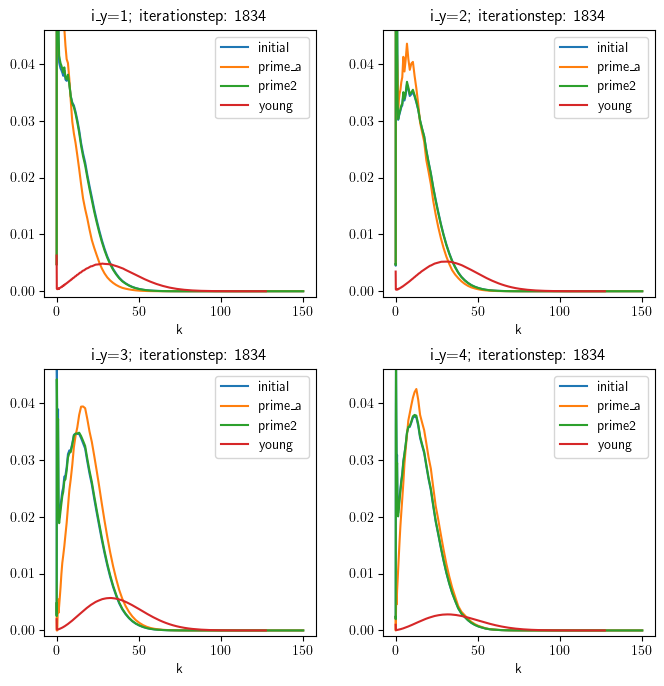

In [ ]:
folders =[]
folder_path = "out_long_run_spline_der_changing_pdf_y_80k50b60steps_square/"#_derdiff_square_80k50b120steps/"#"_out_diffder_80k_50b_50steps_square/"#"out_small_grid_long_run//"#_derdiff_80k50b80steps/"#"out/""#"out_full_spline_derivative/"#"out_derivative_by_diff/"#"out_derdiff_80k50b80steps/"#"out_long_run_spline_der_80k50b50steps_square/"#
files  = os.listdir(folder_path.strip("/"))
for file in files:
    if os.path.isdir(folder_path+file):
        if re.search(r'[0-9]+$',file):
            n = int(re.search(r'[0-9]+$',file).group(0))
            folders.append([n,file])
folders  =pd.DataFrame(folders)
folders.sort_values(by=[0],inplace=True)
folders.reset_index(inplace=True)
fig1, ax1 = plt.subplots(2,2,figsize=(20*cm,20*cm))
file = folders.loc[len(folders)-1,1]
for i_y in range(1,5):
    pdfk_initial = pd.read_csv(folder_path+file+f"/pdf_k_initial_{i_y}.csv",header=None,delimiter=';').to_numpy()
    pdf_k_a = pd.read_csv(folder_path+file+f"/pdf_k_a_{i_y}.csv",header=None,delimiter=';').to_numpy()
    cdf_prime = pd.read_csv(folder_path+file+f"/cdf_prime_{i_y}.csv",header=None,delimiter=';').to_numpy()#[:,:-1]
    cdf_k_prime = cdf_prime[-1,:]
    pdf_k_prime = cdf_k_prime[1:]-cdf_k_prime[:-1]
    cdf_prime = cdf_prime[:-1,:]
    n = folders.loc[file_index,0]
    pdf_k_prime2 = pd.read_csv(folder_path+file+f"/pdf_k_prime_{i_y}.csv",header=None,delimiter=';').to_numpy()
    

    start =0
    stop = 160
    initial = ax1[i_y//3,i_y%2-1].plot(k[start:],pdfk_initial[start:,i_y-1])
    ax1[i_y//3,i_y%2-1].set_title(f"i_y={i_y}; iterationstep: {folders.loc[file_index,0]}")
    prime_a = ax1[i_y//3,i_y%2-1].plot(k[start:],pdf_k_a[start:,i_y-1])
    # prime_a = ax1[i_y//3,i_y%2-1].plot(k[start:stop],1/pdf_k_a[start:stop,i_y-1])
    ax1[i_y//3,i_y%2-1].set_xlabel("k")

    # ax1[i_y//3,i_y%2-1].set_yscale('log',base=10)
    prime2 = ax1[i_y//3,i_y%2-1].plot(k[start:],pdf_k_prime2[start:,i_y-1])
    young = ax1[i_y//3,i_y%2-1].plot(k_young[start:stop],pdf_k_young[start:stop,i_y-1])

    # prime2 = ax1[i_y//3,i_y%2-1].plot(k[start:stop],1/pdf_k_prime2[start:stop,i_y-1])
    if not re.search('normal',file):
        ax1[i_y//3,i_y%2-1].scatter(k[stop-2],(-0.001+0.036)/2,marker="*",s=35,color='indianred')
    ax1[i_y//3,i_y%2-1].legend([initial[0],prime_a[0],prime2[0],young[0]],['initial','prime_a','prime2','young'])
    # ax1[i_y//3,i_y%2-1].legend([initial[0],prime_a[0]],['initial','prime_a'])

    # ax1[i_y//3,i_y%2-1].legend([prime_a[0]],[r'pdf k a/n'])
    ax1[i_y//3,i_y%2-1].set_ylim(-0.001,0.046)
plt.subplots_adjust(hspace=0.27,wspace=0.25)



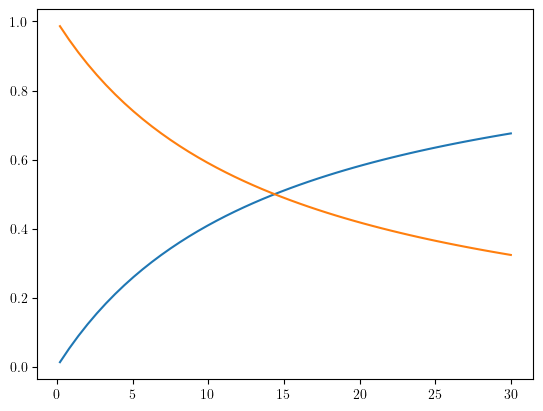

In [27]:
x=np.linspace(0.2,30)
def func(x):
    return 1/(1+0.065/0.935*x)
def func2(x):
    return 1/(1+1/(0.065/0.935*x))
plt.figure()
plt.plot(x,func2(x))
plt.plot(x,func(x))
plt.show()

In [29]:
arr = np.array([
    [0.285714, 0.285714, 0.285714, 0.142857],
    [0.285714, 0.285714, 0.285714, 0.142857],
    [0.285714, 0.285714, 0.285714, 0.142857],
    [0.285714, 0.285714, 0.285714, 0.142857]
]).T
np.linalg.eig(arr)

EigResult(eigenvalues=array([9.99999000e-01, 5.32201469e-17, 0.00000000e+00, 0.00000000e+00]), eigenvectors=array([[ 0.5547002 ,  0.76771812,  0.14744196, -0.14744196],
       [ 0.5547002 ,  0.08448398,  0.73720978, -0.73720978],
       [ 0.5547002 , -0.56813473, -0.58976782,  0.58976782],
       [ 0.2773501 , -0.28406737, -0.29488391,  0.29488391]]))

In [57]:
arr = np.array([ [0.903339,   0.0862435,  4.1704e-7 , 0.0104167],
[ 0.0862435,  0.817096,   0.0862435,  0.0104167],
 [4.1704e-7,  0.0862435 , 0.903339,   0.0104167],
[ 0.0208333 , 0.0208333,  0.0208333 , 0.9375]]).T
np.linalg.eig(arr)

EigResult(eigenvalues=array([0.73085247, 0.99999968, 0.90333858, 0.92708326]), eigenvectors=array([[-4.08248379e-01,  5.54699785e-01, -7.07106781e-01,
        -2.88675852e-01],
       [ 8.16496493e-01,  5.54699956e-01,  1.64286088e-16,
        -2.88675974e-01],
       [-4.08248379e-01,  5.54699785e-01,  7.07106781e-01,
        -2.88675852e-01],
       [ 1.33596856e-08,  2.77352223e-01, -2.93215435e-16,
         8.66024646e-01]]))

120


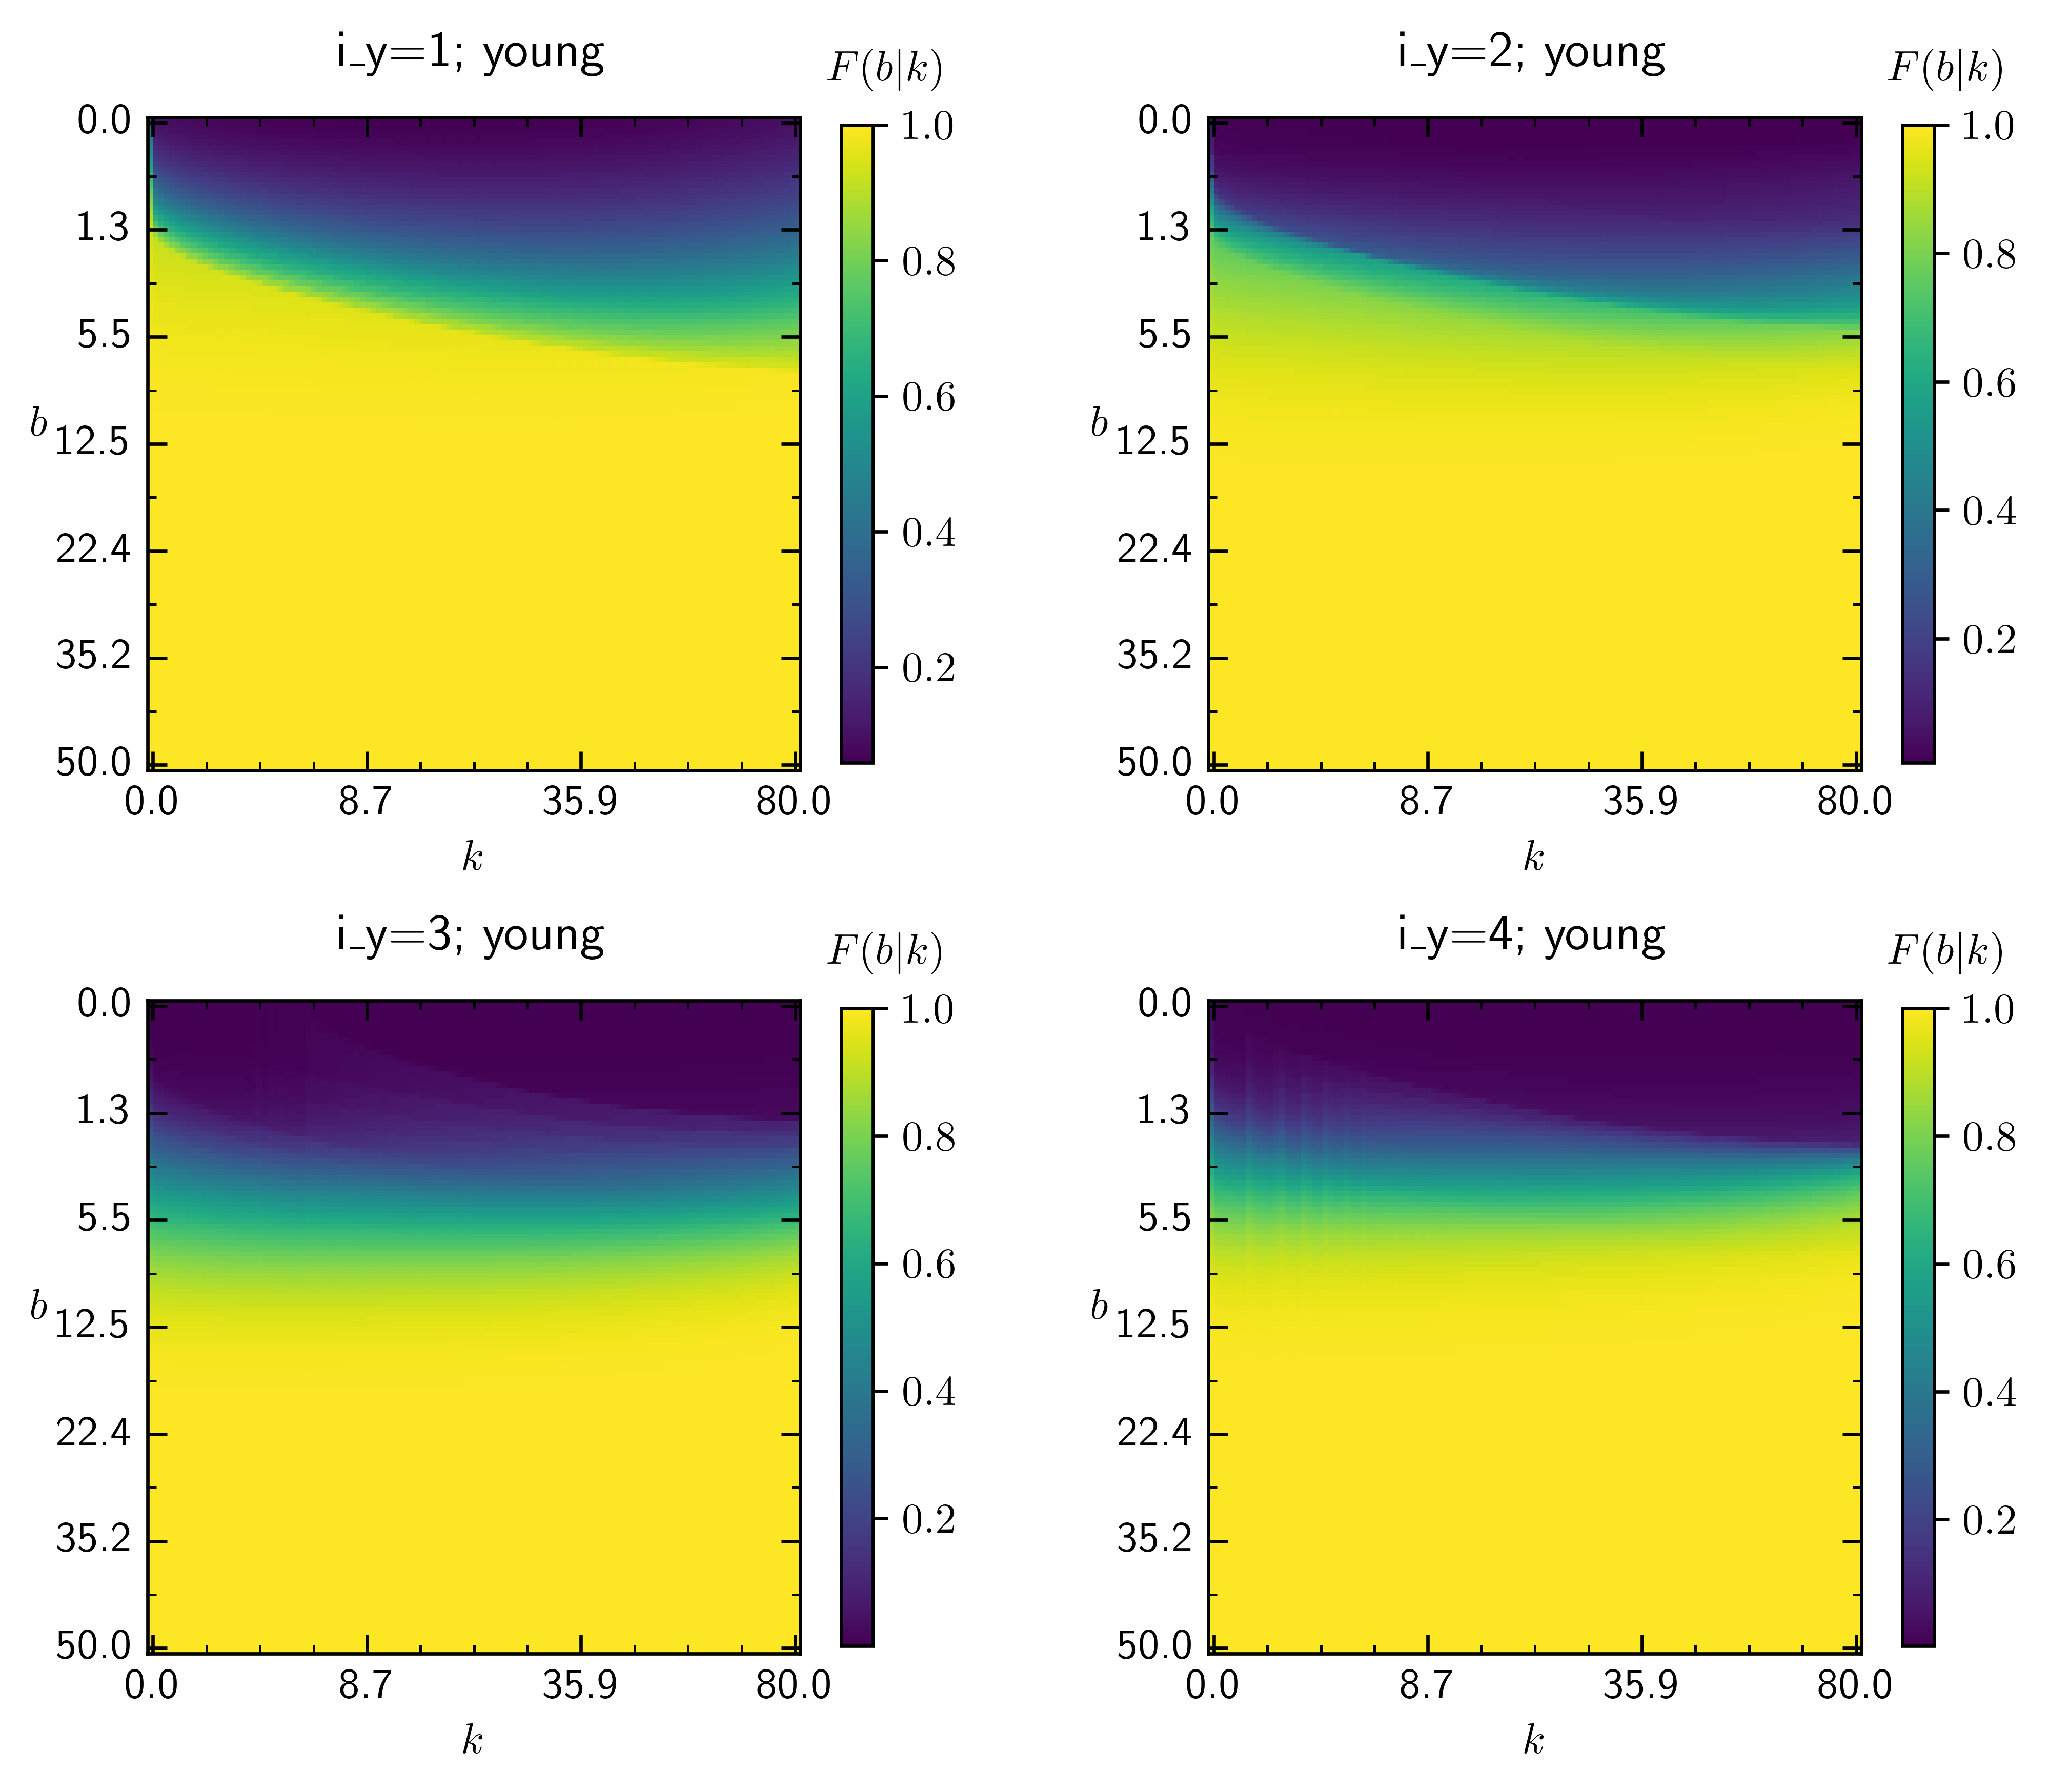

In [19]:
folders =[]
folder_path = "out/"#_long_run_spline_der_80k50b50steps_square/"#"out_derdiff_square_80k50b120steps/"#"_out_diffder_80k_50b_50steps_square/"#"out_small_grid_long_run//"#_derdiff_80k50b80steps/"#"out/""#"out_full_spline_derivative/"#"out_derivative_by_diff/"#"out_derdiff_80k50b80steps/"#
files  = os.listdir(folder_path.strip("/"))
for file in files:
    if os.path.isdir(folder_path+file):
        if re.search(r'[0-9]+$',file):
            n = int(re.search(r'[0-9]+$',file).group(0))
            folders.append([n,file])

folders  =pd.DataFrame(folders)
folders.sort_values(by=[0],inplace=True)
folders.reset_index(inplace=True)
grid_size = pd.read_csv(folder_path+folders.loc[0,1]+f"/pdf_k_initial_1.csv",header=None,delimiter=';').to_numpy().shape[0]
print(grid_size)
k, m = np.ones(grid_size), np.ones(grid_size)
expo = False
if expo:
    k[:-1] = np.exp(np.linspace(np.log(1.0), np.log(80+1.0),  79))[:] - 1.0
    m[:-1] = np.exp(np.linspace(0, np.log(50+ 1.0), 79))[:] - 1.0
else:
    k[:-1] = (np.linspace(0, np.sqrt(80),  grid_size-1))**2
    m[:-1] = (np.linspace(0, np.sqrt(50), grid_size-1))**2
m[-1] = 150
k[-1] = 150
tickformat = Format(xscale=k[:-1],yscale=m[:-1],xprec="{:.1f}",yprec="{:.1f}")
        # plots = [stab_xsol,stab_ysol,stab_zsol]
tickp = TickProperties(SZX=True,SZY=True,\
                    xtick_step_major=20,\
                        xtick_step_minor=5,\
                            ytick_step_major=10,\
                                ytick_step_minor=5)
setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
plot_dim = (-0.5,60.5, 60.5, -0.5)
setup.fig_width= 20*cm
setup.fig_height=20*cm #29.1*cm
# im = plt.imshow(numberc_w)
heat_extent = plot_dim
setup.DEFAULT_HEAT_EXTEND =  heat_extent
fig4, ax4 = setup.return_fig(shape=(2,2),dots_per_inch=600)
# fig1, ax1 = plt.subplots(2,2)
pdf_k_young = pd.read_csv(f"out/pdf_k_young_org.csv",header=None,delimiter=';').to_numpy().astype(np.float32)
k_young = pd.read_csv(f"out/k_young.csv",header=None,delimiter=';').to_numpy().astype(np.float32)
for i_y in range(1,5):
    # cdf_prime = pd.read_csv(f"out/cdf_bcondk_young_org_iy{i_y}.csv",header=None,delimiter=';').to_numpy()[:,:-1].astype(np.float32)
    cdf_prime = pd.read_csv(f"out/cdf_bcondk_young_grid_iy{i_y}.csv",header=None,delimiter=';').to_numpy()[:,:].astype(np.float32)
    start = 0
    stop = 42
    im = ax4[i_y//3,i_y%2-1].imshow(cdf_prime[:,:],extent=plot_dim)

    # ax1[i_y//3,i_y%2-1].plot(k_young[start:stop],1/pdf_k_young[start:stop,i_y-1])
    cbar = plt.colorbar(im,ax=ax4[i_y//3,i_y%2-1],shrink=0.65)
    ax4[i_y//3,i_y%2-1].text(63,-4,s=r'$F(b|k)$')
    ax4[i_y//3,i_y%2-1].set_xlabel(r'$k$')
    ax4[i_y//3,i_y%2-1].set_ylabel(r"$b$",rotation=0)
    if not re.search('normal',file):
        ax4[i_y//3,i_y%2-1].scatter(57,57,marker="*",s=20,color='indianred')
    ax4[i_y//3,i_y%2-1].set_title(loc='center',y=1.04,label=f"i_y={i_y}; young")
    plt.savefig('cdf_bk_full.png',bbox_inches='tight')
    # plt.savefig('out/'+'pdf_inverse.png',bbox_inches='tight')
plt.subplots_adjust(hspace=-0.1,wspace=0.3)
plt.show()


In [16]:
folder_path = "update_funk_500_on_500_each_500/"
ma = pd.read_csv(folder_path+'m_star1_a.csv',delimiter=';',header=None).to_numpy()[:,:-1]
ka = pd.read_csv(folder_path+'k_star1_a.csv',delimiter=';',header=None).to_numpy()[:,:-1]
mn = pd.read_csv(folder_path+'m_star1_n.csv',delimiter=';',header=None).to_numpy()[:,:-1]

m = np.linspace(0,np.sqrt(500),500)**2
k = np.linspace(0,np.sqrt(500),500)**2
m_bins = (m[1:]+m[:-1])/2
m_bins[1:] = m_bins[:-1]
m_bins[0] =0
k_bins = (k[1:]+k[:-1])/2
k_bins[1:] = k_bins[:-1]
k_bins[0] =0

def bin_(ka,k,bins):
    ka_bins = np.digitize(ka,bins)-1
    ka_bined = m[np.where(ka_bins<0,0,ka_bins)]
    ka_bined = np.where(ka_bins==k.shape[0]-1,-np.inf,ka_bined)
    return ka_bined, ka_bins#, np.where(ka_bins==k.shape[0]-1,False,True)
ka_bined, ka_bins = bin_(ka,k,k_bins)
mn_bined, ma_bins = bin_(mn,m,m_bins)
ma_bined, mn_bins = bin_(ma,m,m_bins)


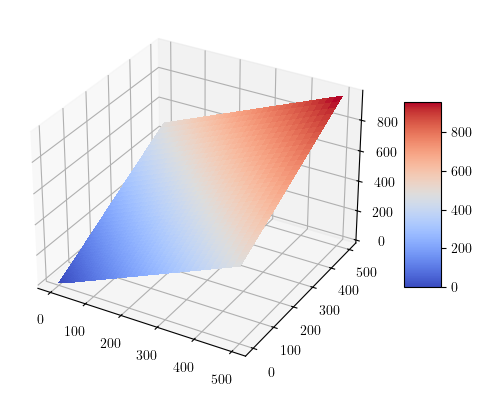

In [25]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.

B, K = np.meshgrid(m,k)


# Plot the surface.
surf = ax.plot_surface(K, B, ka, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# surf2 = ax.plot_surface(K, B, ref,
                    #    linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [ ]:
import imageio
import os
import re
folders =[]
# folder_path = "out/"#"out_derdiff_80k50b80steps/"#
pic_folders = folder_path+"img_pdf_k_plus/"
# pic_folders = folder_path+"img_inverse_pdf_k/"
# pic_folders = folder_path+ "img_bcondk_plusa/"
files  = os.listdir(pic_folders.strip("/"))
for file in files:
        n = int(re.search(r'[0-9]+.png',file).group(0).strip('.png'))
        folders.append([n,file])

folders  =pd.DataFrame(folders)
folders.sort_values(by=[0],inplace=True)
folders.reset_index(inplace=True)


# with imageio.get_writer(folder_path+'bcondk_full_plusa.gif', mode='I', duration=1000) as writer:
with imageio.get_writer(folder_path+'pdf_k_full_an.gif', mode='I', duration=1000) as writer:
# with imageio.get_writer(folder_path+'pdf_k_inverse.gif', mode='I', duration=1000) as writer:
    for filename in folders[1]:
        image = imageio.v2.imread(pic_folders+filename)
        writer.append_data(image)

In [ ]:
import imageio
import os
import re
folders =[]
# folder_path = "out/"#"out_derdiff_80k50b80steps/"#
pic_folders = folder_path+"img_pdf_k_plus/"
# pic_folders = folder_path+"img_inverse_pdf_k/"
# pic_folders = folder_path+ "img_bcondk_plusa/"
files  = os.listdir(pic_folders.strip("/"))
for file in files:
        n = int(re.search(r'[0-9]+.png',file).group(0).strip('.png'))
        folders.append([n,file])

folders  =pd.DataFrame(folders)
folders.sort_values(by=[0],inplace=True)
folders.reset_index(inplace=True)


# with imageio.get_writer(folder_path+'bcondk_full_plusa.gif', mode='I', duration=1000) as writer:
with imageio.get_writer(folder_path+'pdf_k_full_an.gif', mode='I', duration=1000) as writer:
# with imageio.get_writer(folder_path+'pdf_k_inverse.gif', mode='I', duration=1000) as writer:
    for filename in folders[1]:
        image = imageio.v2.imread(pic_folders+filename)
        writer.append_data(image)

/tmp/ipykernel_15571/990155014.py:20: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  colorsk = np.row_stack((colorsk,np.zeros_like(colorsk),np.zeros_like(colorsk))).T
/tmp/ipykernel_15571/990155014.py:22: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  colorsm = np.row_stack((np.zeros_like(colorsm),np.zeros_like(colorsm),colorsm)).T


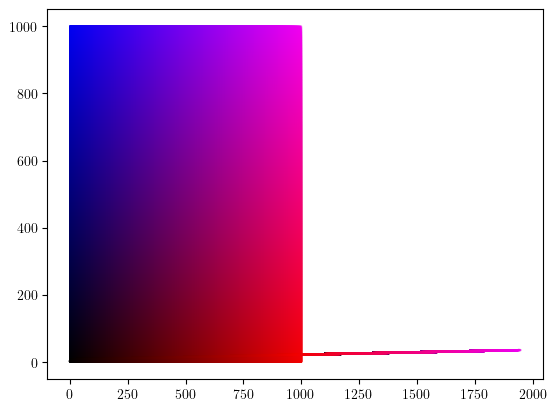

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ka = pd.read_csv('out1/k_star1_a_800.csv',delimiter=';',header=None).to_numpy()[:,:-1]
ma = pd.read_csv('out1/m_star1_a_800.csv',header=None,delimiter=';').to_numpy()[:,:-1]
mn = pd.read_csv('out1/m_star1_n_800.csv',header=None,delimiter=';').to_numpy()[:,:-1]
k = np.linspace(0,1000,800)
m = np.linspace(0,1000,800)
# k = np.exp(np.linspace(np.log(1.0), np.log(2000+1.0),  150)) - 1.0
# m = np.exp(np.linspace(0, np.log(500+ 1.0), 150)) - 1.0
# # ka = np.zeros_like(ma)
# for i in range(ka.shape[0]):
#     ka[:,i] = k[i]
alphas = np.ones((ka.shape[0],ka.shape[1]))*2
for i in range(1,ka.shape[0]):
    for j in range(1,ka.shape[1]):
        alphas[i,j] = np.sqrt(2*ka.shape[0]*ka.shape[1]-i**2-j**2)
alphas /=np.max(alphas)
colorsk = np.round(np.linspace(0,0.95,ka.shape[1]),decimals=3)
colorsk = np.row_stack((colorsk,np.zeros_like(colorsk),np.zeros_like(colorsk))).T
colorsm = np.round(np.linspace(0,0.95,ka.shape[0]),decimals=3)
colorsm = np.row_stack((np.zeros_like(colorsm),np.zeros_like(colorsm),colorsm)).T

# alphas= n.round(np.linspace(0,0.95,150),decimals=3)[::-1]
plt.figure()
for i in range(len(k)):
    plt.scatter(k[i]*np.ones(len(m)),m,color=colorsk[i,:]+colorsm,alpha=alphas[i,:])
    plt.scatter(ka[:,i],ma[:,i],color=colorsk[i,:]+colorsm[:,:],alpha=alphas[i,:])
plt.show()

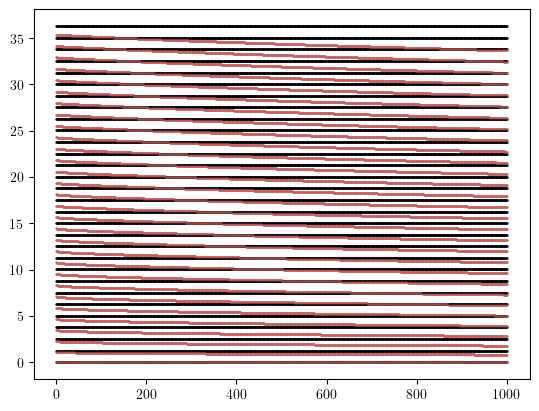

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# alphas = np.ones((150,150))*2
# for i in range(1,150):
#     for j in range(1,150):
#         alphas[i,j] = np.sqrt(2*150**2-i**2-j**2)
# alphas /=np.max(alphas)
# colorsk = np.round(np.linspace(0,0.95,150),decimals=3)
# colorsk = np.row_stack((colorsk,np.zeros_like(colorsk),np.zeros_like(colorsk))).T
# colorsm = np.round(np.linspace(0,0.95,150),decimals=3)
# colorsm = np.row_stack((np.zeros_like(colorsm),np.zeros_like(colorsm),colorsm)).T

# alphas= n.round(np.linspace(0,0.95,150),decimals=3)[::-1]
stop = 30
plt.figure()
for i in range(len(k)):
    plt.scatter(k[i]*np.ones(len(m[:stop])),m[:stop],color='0')
    plt.scatter(k[i]*np.ones(len(m[:stop])),mn[:stop,i],color='indianred')
plt.show()

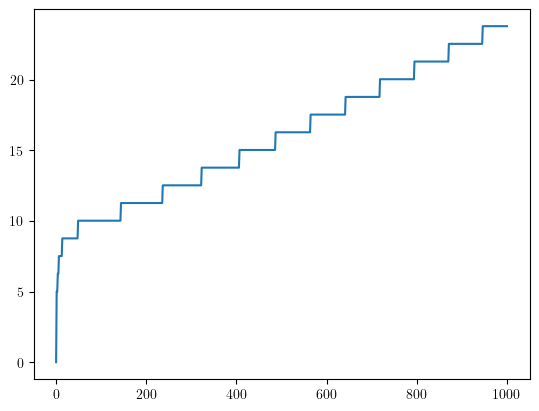

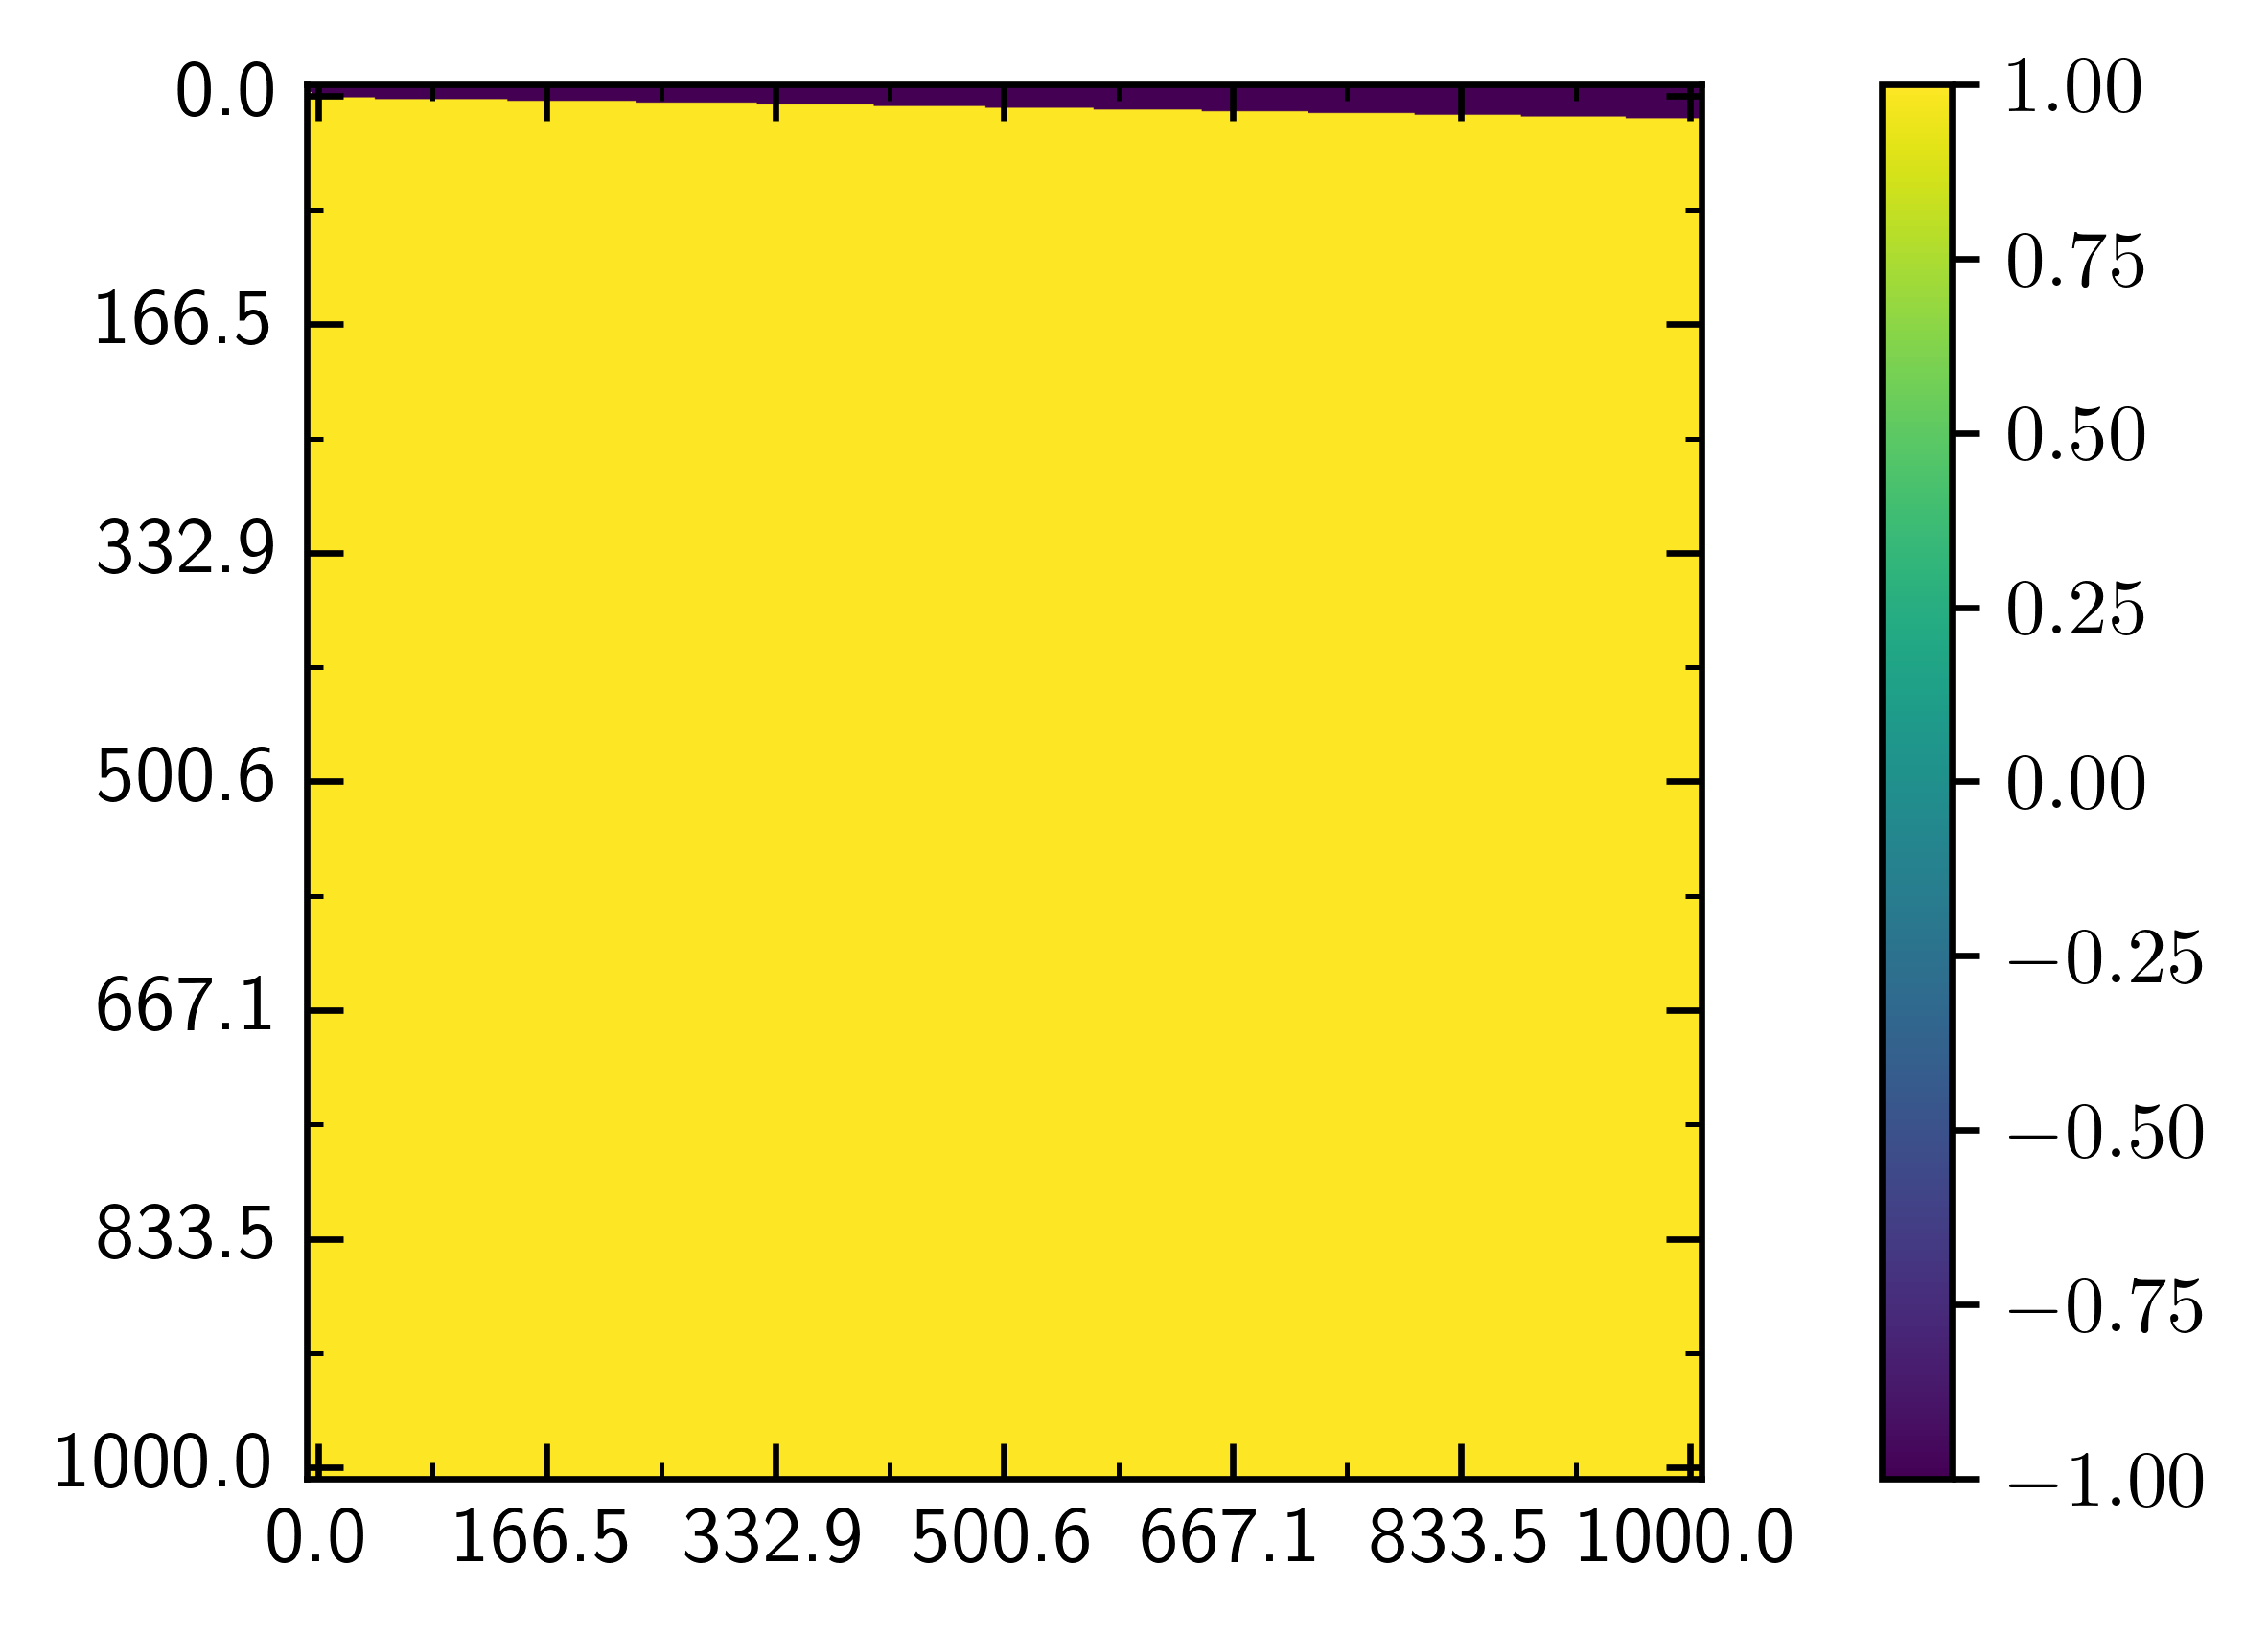

In [ ]:
kprime = np.zeros_like(ka)
b_crit = np.zeros(ka.shape[1])
for i in range(ka.shape[1]):
    kprime[:,i] = np.sign(ka[:,i]-k[i])
    for j in range(ka.shape[1]-1):
        if kprime[j,i]<0 and kprime[j+1,i]>0:
            b_crit[i]=m[j]
            break

plt.figure()
plt.plot(k,b_crit)
plt.show()

tickformat = Format(xscale=k,yscale=m,xprec="{:.1f}",yprec="{:.1f}")
# plots = [stab_xsol,stab_ysol,stab_zsol]
tickp = TickProperties(SZX=True,SZY=True,\
                       xtick_step_major=10,\
                        xtick_step_minor=5,\
                            ytick_step_major=10,\
                                ytick_step_minor=5)
setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
plot_dim = (-0.5,60.5, 60.5, -0.5)
setup.fig_width= 20.6*cm
setup.fig_height=8*cm #29.1*cm
# im = plt.imshow(numberc_w)
heat_extent = plot_dim
setup.DEFAULT_HEAT_EXTEND =  heat_extent
fig, ax = setup.return_fig(shape=(1,1),dots_per_inch=600)

im = ax.imshow(kprime,extent=plot_dim)
cbar = plt.colorbar(im,ax=ax)
plt.show()

/tmp/ipykernel_15571/2489774338.py:33: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(k)/np.log(2000)*60.5,np.log(b_crit)/np.log(500)*60.5)


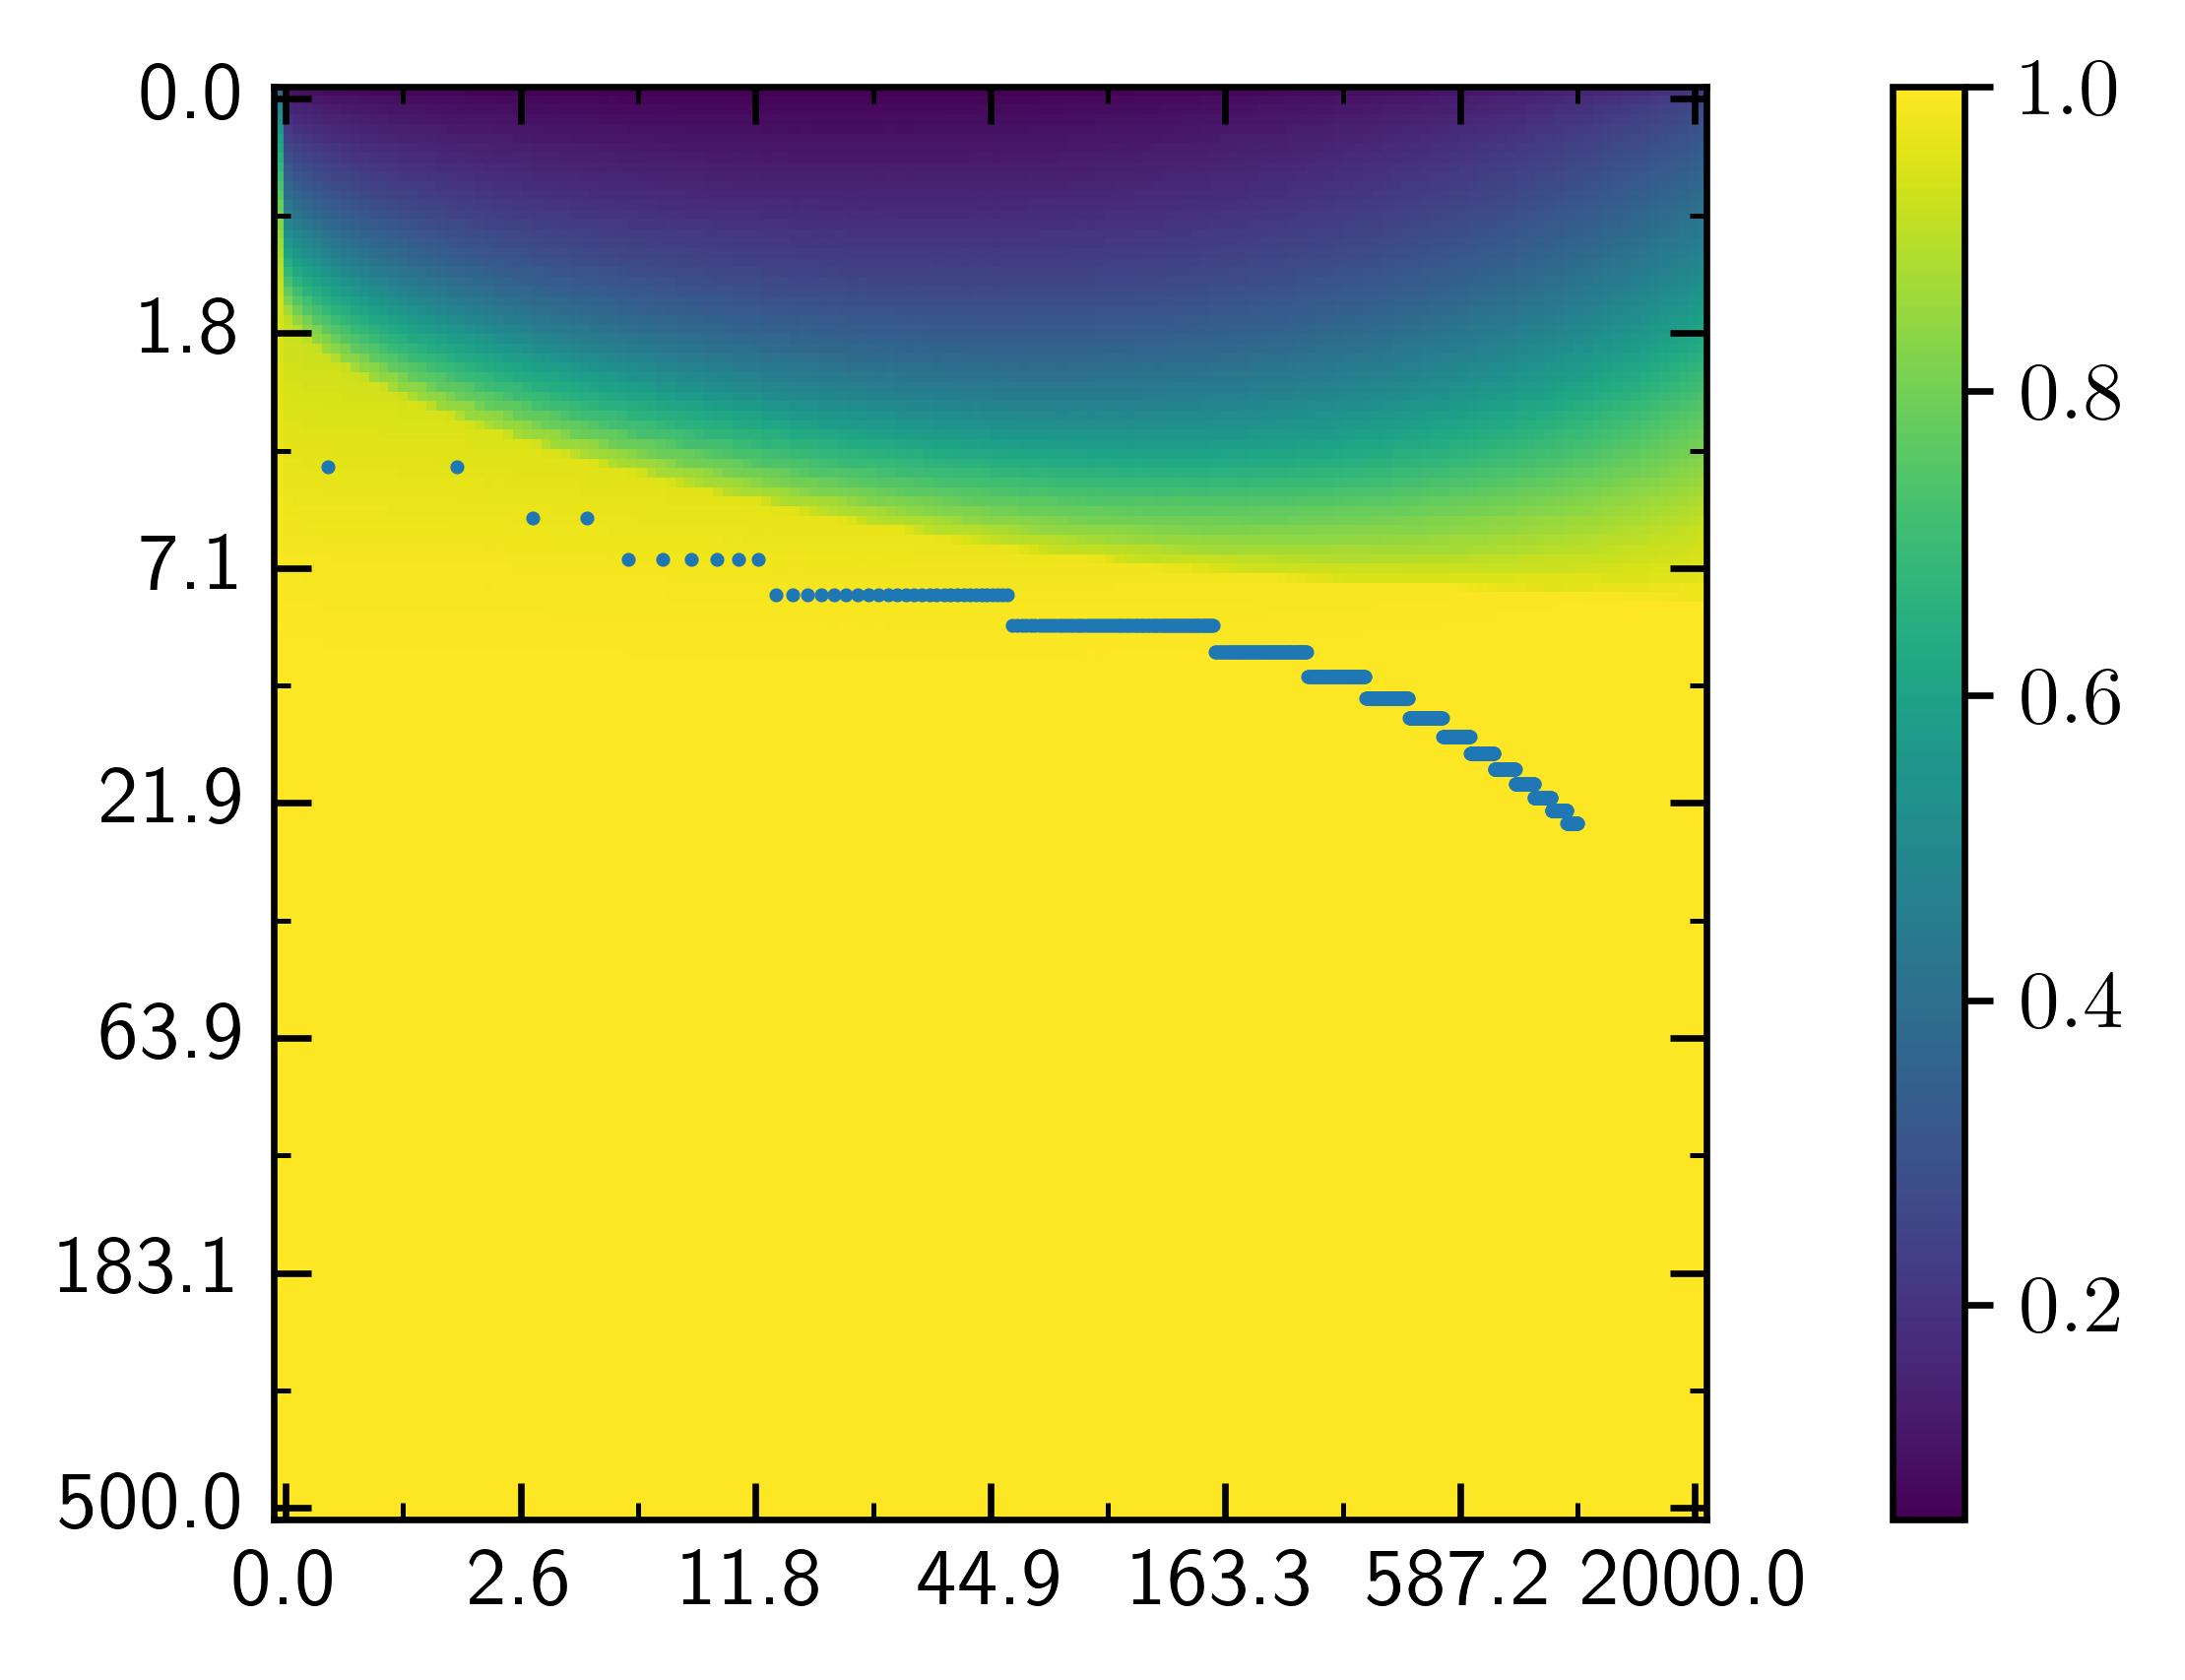

In [ ]:
cdf_k_young = pd.read_csv("out1/young_cdf_k.csv",header=None,delimiter=';').to_numpy()[:,:-1]
cdf_bcondk_young = pd.read_csv("out1/young_cdf_bcondk.csv",header=None,delimiter=';').to_numpy()[:,:-1]

# plt.figure()
# plt.plot(k,cdf_k_young[:,1])
# # plt.scatter(bins[:-1],np.cumsum(number))
# plt.show()
# plt.figure()
# plt.plot(k[:-1],cdf_k_young[1:,1]-cdf_k_young[:-1,1])
# # plt.scatter(bins[:-1],number)
# plt.figure()
kpic = np.exp(np.linspace(np.log(1.0), np.log(2000+1.0),  150))[:] - 1.0
mpic = np.exp(np.linspace(0, np.log(500+ 1.0), 150))[:] - 1.0
tickformat = Format(xscale=kpic,yscale=mpic,xprec="{:.1f}",yprec="{:.1f}")
# plots = [stab_xsol,stab_ysol,stab_zsol]
tickp = TickProperties(SZX=True,SZY=True,\
                       xtick_step_major=10,\
                        xtick_step_minor=5,\
                            ytick_step_major=10,\
                                ytick_step_minor=5)
setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
plot_dim = (-0.5,60.5, 60.5, -0.5)
setup.fig_width= 20.6*cm
setup.fig_height=8*cm #29.1*cm
# im = plt.imshow(numberc_w)
heat_extent = plot_dim
setup.DEFAULT_HEAT_EXTEND =  heat_extent
fig, ax = setup.return_fig(shape=(1,1),dots_per_inch=600)
# print(pdf_bcondk_initial.shape)
# im = ax.imshow(np.log(cdf_bcondk_young),extent=plot_dim)
im = ax.imshow(cdf_bcondk_young,extent=plot_dim)
# plt.scatter(55,55,marker='*',s=10,color='0')
plt.scatter(np.log(k)/np.log(2000)*60.5,np.log(b_crit)/np.log(500)*60.5)
cbar = plt.colorbar(im,ax=ax)

In [ ]:
N=int(150/20*25)
def sort_in_bin(a,stepsize):
    return 0<a<stepsize
sort_in_bin = np.vectorize(sort_in_bin)
binstart = 0
binstop = 2500
stepsize = (binstop-binstart)/N
bins = np.linspace(binstart,binstop,N+1)
number = []
numberk =[]
numberm = []
for ib in range(N):
    number.append(np.sum(sort_in_bin(ka-bins[ib],stepsize)))
number= np.array(number)/np.sum(number)



# number

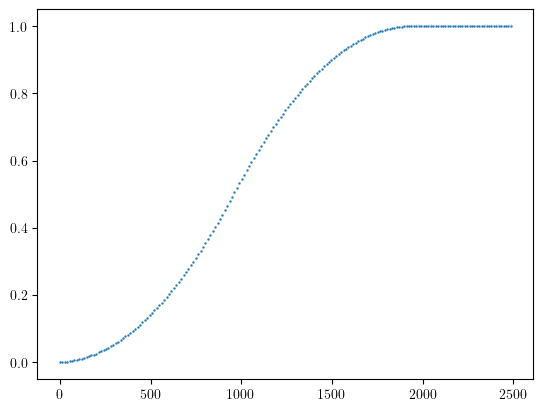

<Figure size 640x480 with 0 Axes>

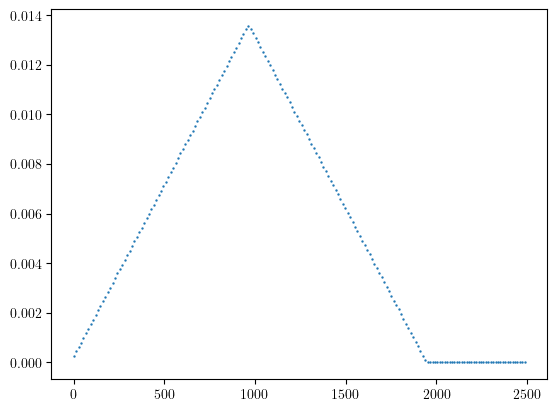

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure()
# plt.plot(k,cdf_k_a[:,1])
plt.scatter(bins[:-1],np.cumsum(number))
plt.show()
plt.figure()
# plt.plot(k[:-1],pdf_k_a[:,1])
plt.scatter(bins[:-1],number)
plt.figure()

# plt.plot(k,cdf_k_young[:,1])
# # plt.scatter(bins[:-1],np.cumsum(number))
# plt.show()
# plt.figure()
# plt.plot(k[:-1],cdf_k_young[1:,1]-cdf_k_young[:-1,1])
# # plt.scatter(bins[:-1],number)
# plt.figure(

In [17]:
a_bins = np.dstack((ma_bins,ka_bins))
bins_2d_a = set()
for i in range(m.shape[0]):
    for j in range(k.shape[0]):
        if a_bins[i,j,0]<len(m)-1 and a_bins[i,j,1]<len(k)-1:
            bins_2d_a.add(tuple(a_bins[i,j,:]))
len(bins_2d_a)

128275

In [18]:
lam = 0.065
from scipy.sparse import coo_array
# q_mat_a = np.zeros((k.shape[0]**2,k.shape[0]**2))
indices= np.zeros((k.shape[0]**2,2))
coordinates_old = []
coordinates_new = []

inverse = np.zeros((len(m),len(k),2,820))
inverse_count = np.zeros((len(m),len(k)),dtype=np.int32)
for i in range(len(k)):
    for j in range(len(m)):
#         inverse[a_bins[i,j,0],a_bins[i,j,1],:,inverse_count[a_bins[i,j,0],a_bins[i,j,1]]]=[i,j]
#         inverse_count[a_bins[i,j,0],a_bins[i,j,1]]+=1
# for i in range(len(k)):
#     for j in range(len(m)):
#         for l in range(inverse_count[i,j]):
            # coordinates_new.append(i+len(m)*j)
            # coordinates_old.append(inverse[i,j,0,l]+len(m)*inverse[i,j,1,l])
            coordinates_old.append(i+len(m)*j)
            coordinates_new.append(a_bins[i,j,0]+len(m)*a_bins[i,j,1])
data = np.ones(len(coordinates_new),dtype=np.float16)*lam

q_mat_a = coo_array((data,(coordinates_new,coordinates_old)),shape=(k.shape[0]**2,k.shape[0]**2),dtype=np.float64)            

        # indices[i+j*len(m)] = [i,j]
        # if ((i,j) in bins_2d_a):
        #     for l in range(len(m)):
        #         for n in range(len(k)):
        #             if np.all([i,j]==a_bins[l,n]):
        #                 coordinates.append([i+j*len(m),l+n*len(m)])
        #                 q_mat_a[i+j*len(m),l+n*len(m)]=lam
# np.max(inverse_count)

In [19]:
indices= np.zeros((k.shape[0]**2,2))
coordinates_old = []
coordinates_new = []

inverse = np.zeros((len(m),len(k),2,820))
inverse_count = np.zeros((len(m),len(k)),dtype=np.int32)
for i in range(len(k)):
    for j in range(len(m)):
#         inverse[mn_bins[i,j],j,:,inverse_count[mn_bins[i,j],j]]=[i,j]
#         inverse_count[mn_bins[i,j],j]+=1
# for i in range(len(k)):
#     for j in range(len(m)):
#         for l in range(inverse_count[i,j]):
            # coordinates_new.append(i+len(m)*j)
            # coordinates_old.append(inverse[i,j,0,l]+len(m)*inverse[i,j,1,l])
            coordinates_old.append(i+len(m)*j)
            coordinates_new.append(mn_bins[i,j]+len(m)*j)
data = np.ones(len(coordinates_new),dtype=np.float16)*(1-lam)
q_mat_n = coo_array((data,(np.array(coordinates_new),np.array(coordinates_old))),shape=(k.shape[0]**2,k.shape[0]**2),dtype=np.float64)     

In [20]:
eigen = (np.array([1.00006104+0.j        , 0.99216565+0.01803211j,
        0.99216565-0.01803211j, 0.99156478-0.01980383j]),
 np.array([[-1.00000000e+00+0.00000000e+00j, -8.36561828e-01-1.96686654e-01j,
         -8.36561828e-01+1.96686654e-01j,  3.54784977e-01+7.61140439e-01j],
        [-2.04830652e-14+0.00000000e+00j,  7.70053287e-03-1.07508920e-02j,
          7.70053287e-03+1.07508920e-02j,  9.68694374e-03-1.03240011e-02j],
        [-4.71128546e-15+0.00000000e+00j,  2.07890187e-03-2.21516315e-03j,
          2.07890187e-03+2.21516315e-03j,  1.85283309e-03-2.66199166e-03j],
        ...,
        [-5.21059334e-21+0.00000000e+00j, -4.41098009e-21-9.52836010e-22j,
         -4.41098009e-21+9.52836010e-22j,  1.78387110e-21+4.03559883e-21j],
        [-3.80319322e-21+0.00000000e+00j, -3.21955840e-21-6.95471555e-22j,
         -3.21955840e-21+6.95471555e-22j,  1.30204106e-21+2.94556898e-21j],
        [ 3.05782002e-21+0.00000000e+00j,  2.58856955e-21+5.59168764e-22j,
          2.58856955e-21-5.59168764e-22j, -1.04685905e-21-2.36827825e-21j]]))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (7,) + inhomogeneous part.

In [ ]:
pdf_grid = np.zeros_like(ka)
for i in range(len(m)):
    for j in range(len(k)):
        pdf_grid[i,j] = eig_vec[i+len(m)*j]

pdf_k = np.sum(pdf_grid,axis=0)
cdf_bcondk = np.matmul(np.cumsum(pdf_grid,axis=0),1/pdf_k)

81

In [35]:

q_mat = q_mat_a + q_mat_n
from scipy.sparse.linalg import eigs
eigs(q_mat,k=4)

(array([1.00006104+0.j        , 0.99216565+0.01803211j,
        0.99216565-0.01803211j, 0.99156478-0.01980383j]),
 array([[-1.00000000e+00+0.00000000e+00j, -8.36561828e-01-1.96686654e-01j,
         -8.36561828e-01+1.96686654e-01j,  3.54784977e-01+7.61140439e-01j],
        [-2.04830652e-14+0.00000000e+00j,  7.70053287e-03-1.07508920e-02j,
          7.70053287e-03+1.07508920e-02j,  9.68694374e-03-1.03240011e-02j],
        [-4.71128546e-15+0.00000000e+00j,  2.07890187e-03-2.21516315e-03j,
          2.07890187e-03+2.21516315e-03j,  1.85283309e-03-2.66199166e-03j],
        ...,
        [-5.21059334e-21+0.00000000e+00j, -4.41098009e-21-9.52836010e-22j,
         -4.41098009e-21+9.52836010e-22j,  1.78387110e-21+4.03559883e-21j],
        [-3.80319322e-21+0.00000000e+00j, -3.21955840e-21-6.95471555e-22j,
         -3.21955840e-21+6.95471555e-22j,  1.30204106e-21+2.94556898e-21j],
        [ 3.05782002e-21+0.00000000e+00j,  2.58856955e-21+5.59168764e-22j,
          2.58856955e-21-5.59168764e-22j, -

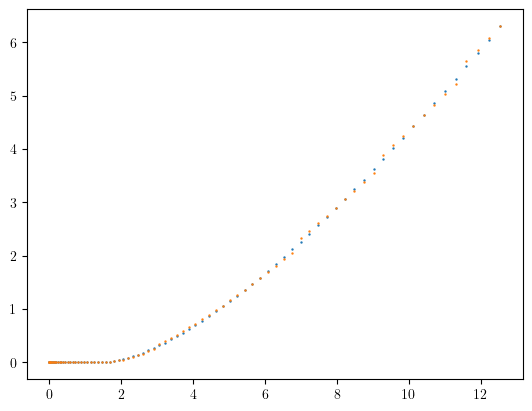

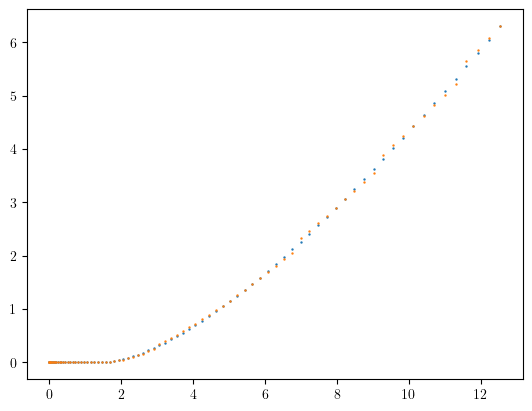

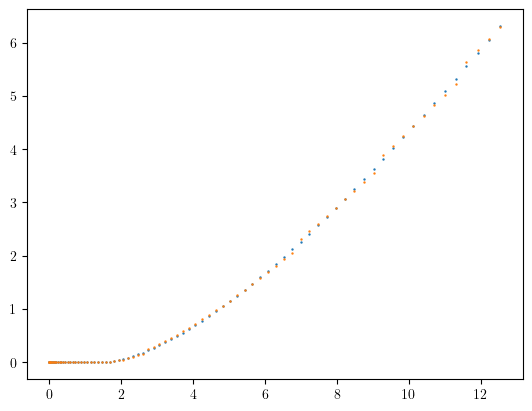

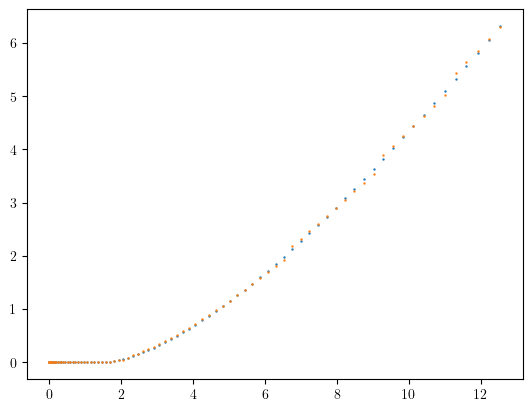

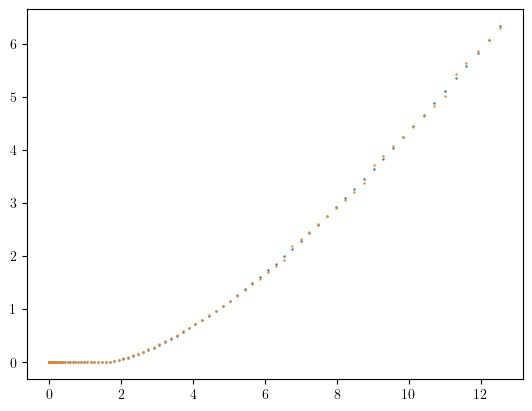

In [21]:
for i in range(5):
    plt.figure()
    stop = 80
    plt.scatter(k[:stop],ka[i,:stop])
    plt.scatter(k[:stop],ka_bined[i,:stop])
    plt.show()

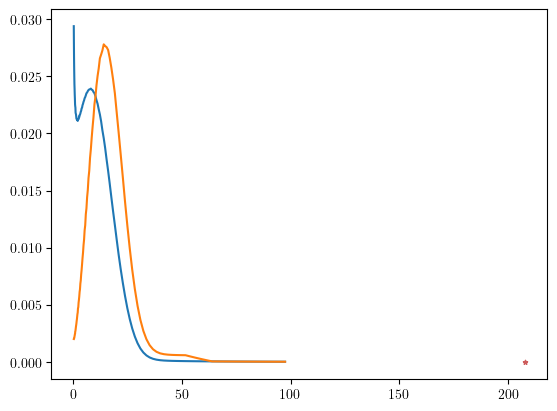

0.020751450460608, 0.023752662199599, 0.025993787751695, 0.02798190540578, 0.029819199522197, 0.03158500534065, 0.033335667954068, 0.035057962195766, 0.036750661825202, 0.038487733588536, 0.040183788630442, 0.041951523326728, 0.043704381799739, 0.045526980302681, 0.047327592325055, 0.049245087686638, 0.051180547928181, 0.053172276428798, 0.055224915267449, 0.057352662699441, 0.059524108583316, 0.061774745601406, 0.064133340882807, 0.066572911509046, 0.069044698150943, 0.071675015162401, 0.074365105916196, 0.077177698348339, 0.080087407273761, 0.083133423001666, 0.086266320859003, 0.08961659615575, 0.093011833213893, 0.096605767379785, 0.100344340038616, 0.104291246677793, 0.108300993427366, 0.112607047091414, 0.117077573185827, 0.121682505974053, 0.126632661256429, 0.131676682949052, 0.137046644000249, 0.142605013009084, 0.148510615815416, 0.15459681744828, 0.161103376484721, 0.167745217428219, 0.174831378440735, 0.182224290569945, 0.189988142630264, 0.198046748042624, 0.20658684450182

In [ ]:
steps = 4
rel = (cdf_k_a[steps:,1]-cdf_k_a[:-steps,1])/(cdfk_initial[steps:,1]-cdfk_initial[:-steps,1])
pdf_rel= []
for i in range(len(rel)):
    if not (np.isnan(rel[i]) or rel[i]==np.inf):
        pdf_rel.append(rel[i])
pdf_rel


plt.figure()
deriv2 = [0.0025326024928439966, 0.0022667928692290014, 0.002132683702742, 0.0020729958046089986, 0.002042862604800001, 0.002029392277365004, 0.0020522620647559983, 0.0020527211680319984, 0.002115639304772002, 0.0021368697274639983, 0.002209796482427001, 0.0022915579860609964, 0.0023462916647350035, 0.002459587314641, 0.0024853990634930018, 0.0026848584632039943, 0.0027220497474430005, 0.002853564218842003, 0.002994912165449004, 0.003138852555098992, 0.003261082578406002, 0.0034133286748670028, 0.003606650068794001, 0.0037600228930059904, 0.0039765289347390015, 0.004200156799980009, 0.004334811510503994, 0.004708541432211999, 0.004813961065880001, 0.005213746425632007, 0.005443416158271999, 0.005742731605759999, 0.006140574899372003, 0.006371210242686998, 0.006871090392753992, 0.007149041209661006, 0.007675592688420996, 0.008060460375399009, 0.008555863798339003, 0.009100473489323996, 0.009575705680783003, 0.010236969740136992, 0.010717072133806987, 0.011528863468397016, 0.011965004903140009, 0.012942929241026996, 0.01345168453906298, 0.014416650752468008, 0.01504721019689198, 0.016095733010536017, 0.016734083987636983, 0.017853779473174014, 0.018617858075324012, 0.01961780515558198, 0.02054692031468902, 0.021428198248677977, 0.022546121388566043, 0.02321688447141096, 0.02421542921148001, 0.025018777102987, 0.025684573273331956, 0.026570753993575003, 0.02689421995333907, 0.02726070908556799, 0.027790077692877002, 0.02764597918289602, 0.02754517275323498, 0.02729951533930397, 0.02661707801539903, 0.025759751050224988, 0.02473343544134199, 0.02352016615915098, 0.02181328792949, 0.02005965526864506, 0.01816621548925801, 0.01617683581527296, 0.01403900745978004, 0.011965340714781947, 0.009968146299562997, 0.008083262479565034, 0.0063996429354329365, 0.004924366904793032, 0.003698192335001016, 0.002736867407783006, 0.0020083374182270353, 0.00148406737530693, 0.0011319453302710558, 0.0009078299300289139, 0.0007734401712840011, 0.000699552676839077, 0.0006596926752330257, 0.0006378681665539787, 0.0006252726182069956, 0.0006168046428000062, 0.0006102265065439649, 0.0005019190259526091, 0.0003935703569643496, 0.0002855486752998002, 0.00017782553847043675, 7.03057927291883e-5, 6.640919555718982e-5, 6.273688880259035e-5, 5.928018681080403e-5, 5.606028306764178e-5, 5.3032118598903176e-5, 5.015918466652544e-5, 4.7472739202522295e-5, 4.494471019625907e-5, 4.25456185979118e-5, 4.029815365124912e-5, 3.8173328951602064e-5, 3.6161817041180265e-5, 3.426873410450781e-5, 3.2476060292497664e-5, 3.0784369279655285e-5, 2.9183827153569154e-5, 2.7670404596280037e-5, 2.6238719929532288e-5, 2.813978886571139e-6, 2.6928568679121253e-6, 2.5687182077931195e-6, 2.4417619553852393e-6, 2.3122359202455328e-6, 2.180443343110119e-6, 2.0467503582641766e-6, 1.91159433645013e-6, 1.7754932070055572e-6, 1.6390558688111002e-6, 1.5029938115253486e-6, 1.36813408198092e-6, 1.2354337452805318e-6, 1.1059960064710187e-6, 9.810881768200544e-7, 8.621616887038701e-7, 7.508743854156032e-7, 6.491153367766774e-7, 5.590324587652919e-7, 4.830632456038723e-7, 4.2396895626421856e-7, 3.8487263447601383e-7, 3.6930138247326313e-7, 3.812333542906766e-7, 4.251499849228423e-7, 5.060940276092403e-7, 6.297340335091121e-7, 8.024359766795349e-7, 1.0313428033659533e-6, 1.3244627688844356e-6, 1.6907675187512379e-6]
deriv = [0.04833243848912351, 0.04229604883502737, 0.036937924105641555, 0.033588309897932295, 0.031244337655482554, 0.029379066565407088, 0.02798595760451699, 0.0267443709844555, 0.02580726369527598, 0.02501954634974098, 0.024300212342875965, 0.02391278559433501, 0.023414420730234174, 0.02305099086119526, 0.022543422625882506, 0.022378056351135562, 0.022258466723582993, 0.021806462127842794, 0.021735591898320916, 0.02166252915638175, 0.02148078331301786, 0.021285865765338086, 0.02127108340031751, 0.02121586458216315, 0.021168093357149843, 0.0212601426606305, 0.02109434860525639, 0.021217402122683297, 0.021253153459800247, 0.02124677778672982, 0.021474879471053875, 0.021416220957958733, 0.02161310841193698, 0.02163572648481589, 0.02174355961595938, 0.02189169571135313, 0.02198334171691641, 0.022184833404514652, 0.022256277425973487, 0.02247204537522329, 0.022592599347236637, 0.022767802313714437, 0.022891194668872555, 0.023080487953919707, 0.023178715956016685, 0.023331850730901462, 0.023514279578697735, 0.023578988247909917, 0.02370129706928118, 0.023794857890412198, 0.02384839454266199, 0.02386507378511177, 0.02392316339994711, 0.023829114709048315, 0.023788684327916566, 0.023625810800138328, 0.02351696729943275, 0.023262084885816076, 0.022908698682783314, 0.022598464103496647, 0.022116165786246818, 0.021658380367036812, 0.021058972935642187, 0.020269876490394086, 0.0195803924351353, 0.018734459935659902, 0.017724315724596335, 0.016736001844802412, 0.015630119872383958, 0.014426097166488981, 0.013212776974546035, 0.011995111380403062, 0.010698023552871047, 0.00938609024302347, 0.008135638791002268, 0.00693844778486187, 0.00579012302456102, 0.004728089530237195, 0.003781486244152751, 0.0029489417033754235, 0.0022419178738078884, 0.0016595084151951834, 0.0011965569130937324, 0.0008466645525466003, 0.0005924744925430069, 0.00041482891693237964, 0.0002966885629169088, 0.00022127658098710843, 0.00017439992305686239, 0.00014583530666571206, 0.00012813806367899477, 0.00011633090023790154, 0.00010764487382824972, 0.00010059594498169692, 9.443867628688946e-5, 8.88939164828488e-5, 8.376902962288099e-5, 7.895974054702763e-5, 7.447587074580399e-5, 7.03057927291883e-5, 6.640919555718982e-5, 6.273688880259035e-5, 5.928018681080403e-5, 5.606028306764178e-5, 5.3032118598903176e-5, 5.015918466652544e-5, 4.7472739202522295e-5, 4.494471019625907e-5, 4.25456185979118e-5, 4.029815365124912e-5, 3.8173328951602064e-5, 3.6161817041180265e-5, 3.426873410450781e-5, 3.2476060292497664e-5, 3.0784369279655285e-5, 2.9183827153569154e-5, 2.7670404596280037e-5, 2.6238719929532288e-5, 2.813978886571139e-6, 2.6928568679121253e-6, 2.5687182077931195e-6, 2.4417619553852393e-6, 2.3122359202455328e-6, 2.180443343110119e-6, 2.0467503582641766e-6, 1.91159433645013e-6, 1.7754932070055572e-6, 1.6390558688111002e-6, 1.5029938115253486e-6, 1.36813408198092e-6, 1.2354337452805318e-6, 1.1059960064710187e-6, 9.810881768200544e-7, 8.621616887038701e-7, 7.508743854156032e-7, 6.491153367766774e-7, 5.590324587652919e-7, 4.830632456038723e-7, 4.2396895626421856e-7, 3.8487263447601383e-7, 3.6930138247326313e-7, 3.812333542906766e-7, 4.251499849228423e-7, 5.060940276092403e-7, 6.297340335091121e-7, 8.024359766795349e-7, 1.0313428033659533e-6, 1.3244627688844356e-6, 1.6907675187512379e-6]
# deriv = [0.07722996958196152, 0.056512168502872565, 0.04408037430643659, 0.038469656296093196, 0.034972498713306314, 0.032548856429896335, 0.030598585575403268, 0.029144089290324658, 0.027869450623788667, 0.026886342130901186, 0.026156044402162244, 0.025364968194403547, 0.02489016063665662, 0.02442090608771415, 0.024057258678907012, 0.02351329490146574, 0.023341993599438195, 0.02328286698129895, 0.022771469648919383, 0.022666501626612844, 0.02266254657442655, 0.02237311284827177, 0.022166381055398626, 0.02223562735604527, 0.02210925023888797, 0.022092591373346546, 0.022216564393070876, 0.021956173295432164, 0.022085894875023583, 0.02220936678971139, 0.022154739750101068, 0.022363601993537763, 0.022373563259297565, 0.022514843158292663, 0.02251776786586367, 0.022692108815451733, 0.022806281252824093, 0.022897239214956004, 0.02311880648849028, 0.023180709442439315, 0.02343528599683413, 0.023548826780052764, 0.023617663045259127, 0.023784591525247454, 0.024081096189640536, 0.024059429832405554, 0.02413553912165601, 0.024403563533279427, 0.02447759574344103, 0.024569021757714866, 0.024657701160298508, 0.024693833951266148, 0.0246708691277946, 0.0247290071769093, 0.02466676014678429, 0.024532364605618074, 0.024313259448149823, 0.024244670665629398, 0.02399948224509973, 0.023610213582674847, 0.02320421811681326, 0.02268176744766363, 0.022226827975614746, 0.021569053527822846, 0.020683769961485205, 0.019956264805442187, 0.01911547229216139, 0.01805998318663391, 0.01702115123654451, 0.015860531357090302, 0.014567491163804774, 0.013308545307504109, 0.012072193047245137, 0.010728006671784338, 0.009373791225482077, 0.008084920758712356, 0.006848608212652529, 0.005664182980450552, 0.004587303297195855, 0.0036298793600139357, 0.00278418488206306, 0.002069756712281336, 0.0014841810509598663, 0.0010219274104043329, 0.0006762894356436088, 0.0004284805202484713, 0.0002585156639702224, 0.00014967952375900673, 8.371681529862632e-5, 4.638386041734949e-5, 2.6888326024796e-5, 1.72449528634456e-5, 1.2596840876283194e-5, 1.036921325500086e-5, 9.233980586803596e-6, 8.531042756318514e-6, 8.00483327519619e-6, 7.558759496344051e-6, 7.1422439028995255e-6, 6.761589607788124e-6, 6.384216507093805e-6, 6.031288117586289e-6, 5.719088901147088e-6, 5.413242204957588e-6, 5.1288795663343204e-6, 4.864223327524462e-6, 4.618526964833948e-6, 4.370610169893367e-6, 4.0276706096681455e-6, 3.4529431758000057e-6, 2.5869168891790555e-6, 1.5944715243677391e-6, 7.804665346548106e-7, 2.921887316435692e-7, 8.363583478343891e-8, 1.7804707829805878e-8, 2.8462750898379475e-9, 3.2692915831425395e-10, 2.8387221159819023e-11, 1.775633601379774e-12, 8.713725160286807e-14, 8.72424764459886e-15, 2.6915056131601656e-15, 1.0658766233641728e-15, 3.929428226963137e-16, 1.1842769951900018e-16, 1.8222387703777996e-17, 4.677989214647335e-19, 5.66414559395472e-19, 4.478305395167193e-19, 8.576621798945778e-19, 1.077890042785005e-18, 1.0593462387469503e-19, -1.6049438291979682e-19, 4.41643628517964e-19, 9.370380594405597e-19, 4.58867055356918e-19, 2.0036971420536786e-19, 1.6224880694901463e-19, 1.284630147949617e-19, 3.1675967343643426e-19, 5.113257618990779e-19, 6.280205659965823e-20, 4.903840830517814e-19, 6.082874828973123e-20, -3.5683448351562107e-19, -5.438885019125686e-19, 1.5229762746708273e-19, 5.357978848057483e-20, 8.41883149906523e-20]
start = 5
end = 110
plt.plot(k[start+1:end+1],deriv[start:end])
plt.plot(k[start+1:end+1],deriv2[start:end])
# plt.plot(k[start+1:end+1],pdf_k_prime[start:end])
plt.scatter(k[128],deriv[128],marker='*',color='indianred',s=10)
plt.show()
print(cdf_k_prime[0],end='')
for i in range(1,len(cdf_k_prime)):
    print(f', {cdf_k_prime[i]}',end='')

In [22]:
pdfy = pd.read_csv("young_pdf.txt",header=None,delimiter=';').to_numpy()[:,:-1]
cdfky = pd.read_csv("cdf_k_young.txt",header=None,delimiter=';').to_numpy()[:,:-1]
pdfk = cdfky[1:,0]-cdfky[0:-1,0]
for i in range(len(k)-1):
    pdfy[:,i]*=pdfk[i]
pdfy, np.max(pdfy), np.any(np.isnan(pdfy))
fig, ax = plt.subplots(1,1)
im = ax.imshow(np.log(pdfy[:,:-1]))
colbar= plt.colorbar(im,ax=ax)
plt.show()
plt.figure()
k = np.exp(np.linspace(np.log(1.0), np.log(2000+1.0),  250)) - 1.0
plt.plot(k[:-1],pdfk)
plt.show()

IndexError: index 249 is out of bounds for axis 0 with size 249

In [ ]:
a= np.reshape(np.arange(9),(3,3))
b = np.reshape(np.arange(9,18),(3,3))
c = np.dstack((a,b))
print(c.shape)
c[:,:,0], c[:,:,1]

(3, 3, 2)


(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 array([[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]]))

In [26]:
grid_prime = np.zeros((len(k),len(m)))
x_0 = np.zeros((len(k),len(m),2))
x_prime = np.dstack((ka,ma))
x_prime_vec = np.zeros((len(k)*len(m),2))
for i in range(len(k)):
    for p in range(len(k)):
        x_0[p,i,:] = [k[i],m[p]]
        x_prime_vec[i+len(K)*p]=x_prime[p,i]


for i in range(len(k)):
    for p in range(len(k)):
        norm = np.linalg.norm(x_0[i,p]-x_prime_vec[:,:],axis=1)
        if np.any(norm<5):
            grid_prime[p,i] = 1
        # for j in range(len(k)):
        #     for l in range(len(k)):
        #         countk = 0
        #         if np.linalg.norm(np.array([ka[j,l],ma[j,l]])-np.array([k[i],m[p]]))<5:
        #             

KeyboardInterrupt: 

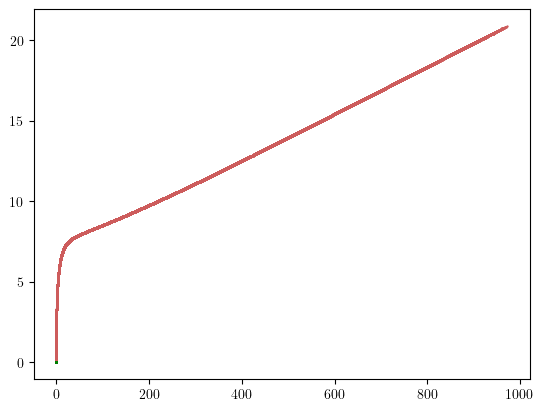

In [24]:
plt.figure()
for i in range(len(k)):
    
        plt.scatter(ka[:,i],ma[:,i],color='indianred')
        
        plt.scatter(ka[:,i]*grid_prime[:,i],ma[:,i]*grid_prime[:,i],color='green')
plt.show()